In [1]:
import pandas as pd
import datetime
import seaborn as sns
import requests
import kaggle
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

How do I download using requests / API? 
https://github.com/Kaggle/kaggle-api <br>
kaggle datasets download -d christophercorrea/dc-residential-properties <br> 

**General Exploration of the Data:**

In [2]:
#how do I not write the entire file path?
data = pd.read_csv('/Users/Julia/dc-residential-properties/DC_Properties.csv', low_memory=False)
print(data.shape)
print(data.columns.tolist())
data.head()

(158957, 49)
['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT']


Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0           0       4          0      Warm Cool  Y        2.0      8      4   
1           1       3          1      Warm Cool  Y        2.0     11      5   
2           2       3          1  Hot Water Rad  Y        2.0      9      5   
3           3       3          1  Hot Water Rad  Y        2.0      8      5   
4           4       2          1      Warm Cool  Y        1.0     11      3   

      AYB  YR_RMDL   EYB  STORIES             SALEDATE      PRICE QUALIFIED  \
0  1910.0   1988.0  1972      3.0  2003-11-25 00:00:00  1095000.0         Q   
1  1898.0   2007.0  1972      3.0  2000-08-17 00:00:00        NaN         U   
2  1910.0   2009.0  1984      3.0  2016-06-21 00:00:00  2100000.0         Q   
3  1900.0   2003.0  1984      3.0  2006-07-12 00:00:00  1602000.0         Q   
4  1913.0   2012.0  1985      3.0                  NaN        NaN         U   

   SALE_NUM     GBA  BLDG_NUM    STYLE         STRUCT      GRADE      CNDTN  \
0         1  2522.0         1  3 Story     Row Inside  Very Good       Good   
1         1  2567.0         1  3 Story     Row Inside  Very Good       Good   
2         3  2522.0         1  3 Story     Row Inside  Very Good  Very Good   
3         1  2484.0         1  3 Story     Row Inside  Very Good       Good   
4         1  5255.0         1  3 Story  Semi-Detached  Very Good       Good   

        EXTWALL        ROOF   INTWALL  KITCHENS  FIREPLACES  USECODE  \
0  Common Brick  Metal- Sms  Hardwood       2.0           5       24   
1  Common Brick    Built Up  Hardwood       2.0           4       24   
2  Common Brick    Built Up  Hardwood       2.0           4       24   
3  Common Brick    Built Up  Hardwood       2.0           3       24   
4  Common Brick     Neopren  Hardwood       1.0           0       13   

   LANDAREA    GIS_LAST_MOD_DTTM       SOURCE  CMPLX_NUM  LIVING_GBA  \
0      1680  2018-07-22 18:01:43  Residential        NaN         NaN   
1      1680  2018-07-22 18:01:43  Residential        NaN         NaN   
2      1680  2018-07-22 18:01:43  Residential        NaN         NaN   
3      1680  2018-07-22 18:01:43  Residential        NaN         NaN   
4      2032  2018-07-22 18:01:43  Residential        NaN         NaN   

                    FULLADDRESS        CITY STATE  ZIPCODE  \
0          1748 SWANN STREET NW  WASHINGTON    DC  20009.0   
1          1746 SWANN STREET NW  WASHINGTON    DC  20009.0   
2          1744 SWANN STREET NW  WASHINGTON    DC  20009.0   
3          1742 SWANN STREET NW  WASHINGTON    DC  20009.0   
4  1804 NEW HAMPSHIRE AVENUE NW  WASHINGTON    DC  20009.0   

         NATIONALGRID   LATITUDE  LONGITUDE ASSESSMENT_NBHD  \
0  18S UJ 23061 09289  38.914680 -77.040832      Old City 2   
1  18S UJ 23067 09289  38.914683 -77.040764      Old City 2   
2  18S UJ 23074 09289  38.914684 -77.040678      Old City 2   
3  18S UJ 23078 09288  38.914683 -77.040629      Old City 2   
4  18S UJ 23188 09253  38.914383 -77.039361      Old City 2   

  ASSESSMENT_SUBNBHD  CENSUS_TRACT CENSUS_BLOCK    WARD SQUARE          X  \
0   040 D Old City 2        4201.0  004201 2006  Ward 2   0152 -77.040429   
1   040 D Old City 2        4201.0  004201 2006  Ward 2   0152 -77.040429   
2   040 D Old City 2        4201.0  004201 2006  Ward 2   0152 -77.040429   
3   040 D Old City 2        4201.0  004201 2006  Ward 2   0152 -77.040429   
4   040 D Old City 2        4201.0  004201 2006  Ward 2   0152 -77.040429   

           Y QUADRANT  
0  38.914881       NW  
1  38.914881       NW  
2  38.914881       NW  
3  38.914881       NW  
4  38.914881       NW

In [3]:
ddat = pd.DataFrame.drop(data, columns = 'Unnamed: 0')

In [4]:
#percentages of NaN values per column
def perc_nan(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    print(percnan)
perc_nan(ddat)

BATHRM                0.000000
HF_BATHRM             0.000000
HEAT                  0.000000
AC                    0.000000
NUM_UNITS             0.328774
ROOMS                 0.000000
BEDRM                 0.000000
AYB                   0.001705
YR_RMDL               0.490881
EYB                   0.000000
STORIES               0.329051
SALEDATE              0.168410
PRICE                 0.382122
QUALIFIED             0.000000
SALE_NUM              0.000000
GBA                   0.328774
BLDG_NUM              0.000000
STYLE                 0.328774
STRUCT                0.328774
GRADE                 0.328774
CNDTN                 0.328774
EXTWALL               0.328774
ROOF                  0.328774
INTWALL               0.328774
KITCHENS              0.328781
FIREPLACES            0.000000
USECODE               0.000000
LANDAREA              0.000000
GIS_LAST_MOD_DTTM     0.000000
SOURCE                0.000000
CMPLX_NUM             0.671226
LIVING_GBA            0.671226
FULLADDR

In [5]:
#delete NaN rows from X, Y, and ASSESSMENT_NBHD so we can use them as reference points for filling others
ddat = ddat.dropna(subset=['X', 'Y', 'ASSESSMENT_NBHD'])

In [6]:
#Are values the same for CITY and STATE?
print(ddat.CITY.value_counts())
print(ddat.STATE.value_counts())

WASHINGTON    105815
Name: CITY, dtype: int64
DC    105815
Name: STATE, dtype: int64


In [7]:
ddat = pd.DataFrame.drop(ddat, columns=['GIS_LAST_MOD_DTTM', 'BLDG_NUM', 'CMPLX_NUM', 'STATE', 'CITY', 'FULLADDRESS', 'NATIONALGRID'])
print(ddat.shape)

(158720, 41)


**Creating the dataset for price prediction:**

In [8]:
#We will make a small dataset, which contains no null values from price. 
sdat = ddat.dropna(subset=['PRICE'])
print(sdat.shape)

(98115, 41)


In [9]:
#if we remove all NaNs, we have no data.
nandat = sdat.dropna()
nandat.head()

Empty DataFrame
Columns: [BATHRM, HF_BATHRM, HEAT, AC, NUM_UNITS, ROOMS, BEDRM, AYB, YR_RMDL, EYB, STORIES, SALEDATE, PRICE, QUALIFIED, SALE_NUM, GBA, STYLE, STRUCT, GRADE, CNDTN, EXTWALL, ROOF, INTWALL, KITCHENS, FIREPLACES, USECODE, LANDAREA, SOURCE, LIVING_GBA, ZIPCODE, LATITUDE, LONGITUDE, ASSESSMENT_NBHD, ASSESSMENT_SUBNBHD, CENSUS_TRACT, CENSUS_BLOCK, WARD, SQUARE, X, Y, QUADRANT]
Index: []

In [10]:
#TWO LISTS OF COLUMNS. ONE CATEGORICAL, ONE NUMERICAL: catcol and numcol
#TWO corresponding dataframes: catdf and numdf
catcol = []
numcol = []

for col in sdat.columns:
    if (sdat[col].dtype == object):
        catcol.append(col)
    if (sdat[col].dtype == np.int64) or (sdat[col].dtype == np.float64):
        numcol.append(col)
        
catdf = sdat[catcol].astype('category')
numdf = sdat[numcol].astype(np.float64)

print(catcol)
print(numcol)

['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'SOURCE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT']
['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'X', 'Y']


**Outlier detection for numerical columns:**

In [11]:
#show information about values, outlier counts, and fences per numerical variable 
#this will assist in evaluating the revelence of an outlier calculated via quantile method
def show_outliers(df_in, col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print(col)
    print("fence_low:", fence_low) 
    print("Q1:", q1)
    print("Q3:", q3) 
    print("fence_high:", fence_high)
    print("num_outliers:", len(df_out))
    print((df_in[col].value_counts().sort_index()))
    print('')
    print('')
#for col in numdf.columns:
    #show_outliers(numdf, col)

In [12]:
#some columns look skew. 
#Let's find a way to eliminate outliers without eliminating too much skew by adjusting fences. 
def perc_outliers(df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print("Percentage of outliers:", len(df_out)/len(df_in))

Percentage of outliers: 0.016766039851195028
None


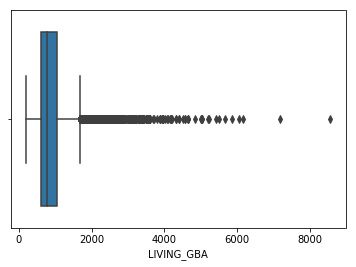

In [13]:
print(perc_outliers(sdat, 'LIVING_GBA', 1.5, 1.5))
sns.boxplot(x=sdat['LIVING_GBA'], whis=1.5)

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


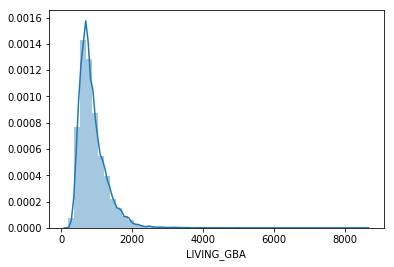

In [14]:
sns.distplot(sdat['LIVING_GBA'].dropna())

Percentage of outliers: 0.035896651888090506
None


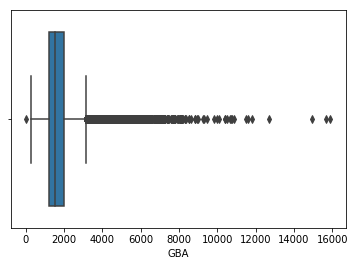

In [15]:
print(perc_outliers(sdat, 'GBA', 1.5, 1.5))
sns.boxplot(x=sdat['GBA'], whis=1.5)

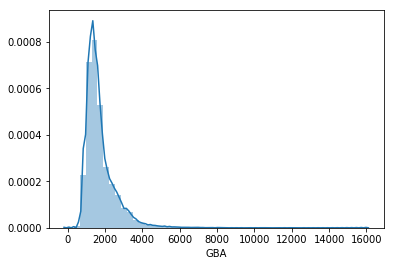

In [16]:
sns.distplot(sdat['GBA'].dropna())

Percentage of outliers: 0.0296183050501962
None


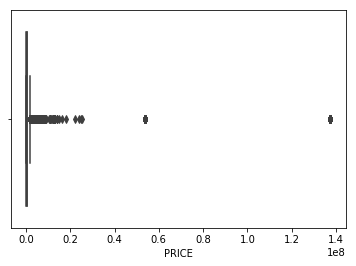

In [17]:
print(perc_outliers(sdat, 'PRICE', 1, 2.5))
sns.boxplot(x=sdat['PRICE'], whis=2.5)

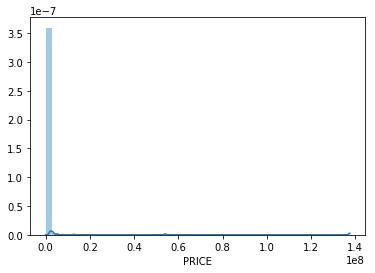

In [18]:
sns.distplot(sdat['PRICE'].dropna())

Percentage of outliers: 0.03231921724506956
None


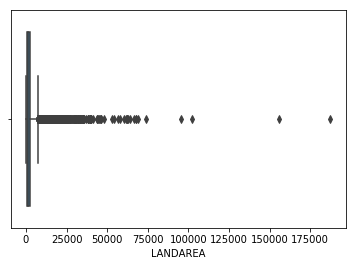

In [19]:
print(perc_outliers(sdat, 'LANDAREA', 1, 2.5))
sns.boxplot(x=sdat['LANDAREA'], whis=2.5)

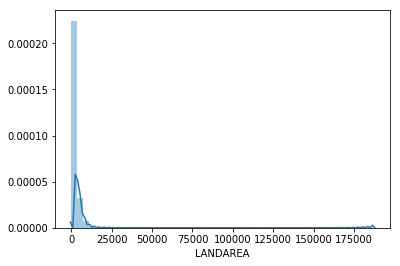

In [20]:
sns.distplot(sdat['LANDAREA'].dropna())

**Outlier detection for categorical data:**

In [21]:
#checking values for categorical data:
#for col in catdf.columns:
   # print(col) 
   # print(catdf[col].value_counts().sort_index())
   # print("")
   # print("")

**Removing outliers:**

In [22]:
#The only data that was likely faulty (and not just out of "the norm") was
#STORIES: 250.00, 275.00, 826.00        
#YR_RMDL: 20

odat2 = sdat.loc[((sdat['STORIES'] < 30) | (sdat['STORIES'].isna()))  & ((sdat['YR_RMDL'] >= 1880) | (sdat['YR_RMDL'].isna()))]

print(odat2.shape)

(98110, 41)


In [23]:
#Numerical:
#Create a list of all row indices matching outliers from specified columns.
takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i) 
    
remove_outliers(odat2, 'GBA', 1.5, 1.5)
remove_outliers(odat2, 'LIVING_GBA', 1.5, 1.5)
remove_outliers(odat2, 'LANDAREA', 1, 2.5)
remove_outliers(odat2, 'PRICE', 1, 2.5)
print(len(takind))

8356


In [24]:
#Remove those rows
odatd = odat2.drop(index=takind)
print(odatd.shape)

(89754, 41)


**Removing and replacing null values using location for fill value predictions:**

In [25]:
#percentage of missing data per row in new dataset
def missingdat(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    nulcolstat = percnan[percnan>0]
    nullist = (nulcolstat.index).tolist()
    nuldat = sdat[nullist]
    print(nulcolstat)
print(missingdat(odatd))

NUM_UNITS             0.422689
AYB                   0.001081
YR_RMDL               0.413486
STORIES               0.422967
SALEDATE              0.000011
GBA                   0.422689
STYLE                 0.422689
STRUCT                0.422689
GRADE                 0.422689
CNDTN                 0.422689
EXTWALL               0.422689
ROOF                  0.422689
INTWALL               0.422689
KITCHENS              0.422700
LIVING_GBA            0.577311
ASSESSMENT_SUBNBHD    0.195713
CENSUS_BLOCK          0.425864
dtype: float64
None


In [26]:
#create categorical and numerical dataframes
catcol = []
numcol = []
for col in odatd.columns:
    if (odatd[col].dtype == object):
        catcol.append(col)
    if (odatd[col].dtype == np.int64) or (odatd[col].dtype == np.float64):
        numcol.append(col)
catdf = odatd[catcol].astype('category')
numdf = odatd[numcol].astype(np.float64)

**Filling numerical nulls using mean values according to neighborhoods:**

In [27]:
odatd.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'SOURCE', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [28]:
#NUM df with nulls:
numnulls = numdf.columns[numdf.isna().any()].tolist()
numnulldf = numdf[numnulls]
#NUM df without nulls:
numgooddf = numdf.drop(columns=numnulls)

In [29]:
#DF with means via neighborhood with WARD for grouping perspective. 
meandf= pd.DataFrame()
for col in numdf.columns:
    meandf[col] = (odatd.groupby(['WARD', 'ASSESSMENT_NBHD'])[col].apply(lambda x: x.mean()))
meandf.head(10)

BATHRM  HF_BATHRM  NUM_UNITS     ROOMS     BEDRM  \
WARD   ASSESSMENT_NBHD                                                        
Ward 1 Columbia Heights  1.736582   0.285134   1.298188  5.264477  2.447387   
       Kalorama          1.385724   0.177763   1.620690  3.888813  1.527797   
       Ledroit Park      1.915119   0.533156   1.247525  6.005305  3.002653   
       Mt. Pleasant      1.768526   0.328877   1.425799  5.069519  2.301757   
       Old City 2        1.718646   0.366260   1.292546  5.174251  2.164817   
Ward 2 Burleith          2.403302   0.580189   1.090047  7.235849  3.323113   
       Central-tri 1     1.355087   0.154162   1.988506  3.759507  1.282631   
       Central-tri 3     1.293643   0.124622        NaN  3.399596  1.201816   
       Foggy Bottom      1.200692   0.155709   1.151515  3.237601  0.957324   
       Georgetown        1.845937   0.512980   1.097983  5.513544  2.340293   

                                 AYB      YR_RMDL          EYB   STORIES  \
WARD   ASSESSMENT_NBHD                                                     
Ward 1 Columbia Heights  1934.719965  2006.705225  1958.864230  2.195016   
       Kalorama          1922.670337  1989.866332  1925.680851  2.635057   
       Ledroit Park      1917.562334  2007.490842  1961.952255  2.211221   
       Mt. Pleasant      1940.603976  2001.554069  1958.829259  2.422945   
       Old City 2        1953.441176  2002.021595  1969.894007  2.327707   
Ward 2 Burleith          1946.103774  2000.152284  1976.146226  2.182464   
       Central-tri 1     1969.738952  1988.458002  1969.083248  2.554598   
       Central-tri 3     2000.330979  2005.693069  2000.306256       NaN   
       Foggy Bottom      1957.430219  1984.201923  1964.439446  2.250000   
       Georgetown        1925.541502  1993.651226  1967.435102  2.272719   

                                 PRICE  SALE_NUM          GBA  KITCHENS  \
WARD   ASSESSMENT_NBHD                                                    
Ward 1 Columbia Heights  438919.636299  1.858581  1609.806013  1.345964   
       Kalorama          459430.100892  1.882636  2393.839080  1.747126   
       Ledroit Park      468040.856764  1.806366  1554.864686  1.280528   
       Mt. Pleasant      551102.723453  1.899924  1951.417808  1.447489   
       Old City 2        574502.722531  1.934517  1583.151899  1.299578   
Ward 2 Burleith          856860.976415  1.837264  1673.270142  1.132701   
       Central-tri 1     484152.785714  1.804728  2000.850575  1.988506   
       Central-tri 3     502523.294147  1.910192          NaN       NaN   
       Foggy Bottom      342703.424452  1.717416  1333.530303  1.181818   
       Georgetown        757792.980248  1.932280  1597.109510  1.162344   

                         FIREPLACES    USECODE     LANDAREA   LIVING_GBA  \
WARD   ASSESSMENT_NBHD                                                     
Ward 1 Columbia Heights    0.208686  15.418432  1039.873941   837.140915   
       Kalorama            0.404255  16.568977   485.025395   808.086131   
       Ledroit Park        0.432361  14.405836  1427.307692   809.797297   
       Mt. Pleasant        0.429717  15.978228  1011.334989   870.839839   
       Old City 2          0.410100  15.677580   686.937847   910.971586   
Ward 2 Burleith            1.018868  11.841981  2205.502358  1688.500000   
       Central-tri 1       0.257451  16.996917   258.365879   806.090909   
       Central-tri 3       0.029768  16.995459   102.274470   860.033804   
       Foggy Bottom        1.302191  16.431373   286.497116   633.885714   
       Georgetown          0.931151  14.089165  1083.559819   946.009576   

                              ZIPCODE   LATITUDE  LONGITUDE  CENSUS_TRACT  \
WARD   ASSESSMENT_NBHD                                                      
Ward 1 Columbia Heights  20008.204802  38.928485 -77.028694   3220.106638   
       Kalorama          20009.000000  38.919409 -77.044936   4001.459849   
       Ledroit Park      20001.000000  38.9

In [30]:
#Finding missing data in meandf:
nulmeancol = meandf.columns[meandf.isnull().any()]
nulmeanind = (meandf[meandf.isnull().any(axis=1)]).index.tolist()
print(nulmeancol)
print("")
print(nulmeanind)
#meandf[nulmeancol]

Index(['NUM_UNITS', 'STORIES', 'GBA', 'KITCHENS', 'LIVING_GBA'], dtype='object')

[('Ward 2', 'Central-tri 3'), ('Ward 3', 'Foxhall'), ('Ward 3', 'Kent'), ('Ward 3', 'Massachusetts Avenue Heights'), ('Ward 3', 'Woodley'), ('Ward 4', 'Chevy Chase'), ('Ward 4', 'Colonial Village'), ('Ward 4', 'Crestwood'), ('Ward 4', 'Hawthorne'), ('Ward 4', 'Riggs Park'), ('Ward 4', 'Shepherd Heights'), ('Ward 5', 'Michigan Park'), ('Ward 5', 'Riggs Park'), ('Ward 7', 'Anacostia')]


In [31]:
#Filling missing data in central tri-3 with data from central tri-1:
fillcols = meandf.columns[(meandf.loc[('Ward 2', 'Central-tri 3')].isnull())]
meandf.loc[('Ward 2', 'Central-tri 3'), fillcols] = meandf.loc[('Ward 2', 'Central-tri 1'), fillcols]

In [32]:
#Filling the rest of meandf with means of Wards. 
for col in meandf:
    meandf[col] = meandf[col].transform(lambda x: x.fillna(x.mean()))

In [33]:
#prepare df to use as dict to fill NaNs:
meandf = meandf.reset_index(level='WARD')

In [34]:
#filling missing numerical data
numfilleddf = pd.DataFrame()
numdf2 = pd.concat([numdf, odatd['ASSESSMENT_NBHD']], axis=1).astype('category')
for col in numnulldf.columns:
    #get index of missing values
    colindex = numdf2[numdf2[col].isnull()].index.tolist()
    #generate mean dictionary
    coldict = dict(zip(meandf.index, meandf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(numdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in numdf2[col].cat.categories:
            numdf2[col] = numdf2[col].cat.add_categories([filler])
        numfilleddf[col] = numdf2[col].fillna(filler)

**Filling categorical null values using mode values according to neighborhoods:**

In [35]:
#CAT df with nulls 
catnulls = catdf.columns[catdf.isna().any()].tolist()
catnulldf = catdf[catnulls]
#CAT df without nulls 
catgooddf = catdf.drop(columns=catnulls)

In [36]:
#Df with mode values. 
modedf = pd.DataFrame()
for col in catdf.columns:
    modedf[col] = odatd.groupby('ASSESSMENT_NBHD')[col].apply(lambda x: x.mode())
modedf.head()

HEAT AC             SALEDATE QUALIFIED  \
ASSESSMENT_NBHD                                                          
16th Street Heights 0  Hot Water Rad  Y  2016-08-18 00:00:00         Q   
American University 0      Warm Cool  Y  2005-09-30 00:00:00         Q   
Anacostia           0     Forced Air  Y  2013-07-16 00:00:00         Q   
Barry Farms         0     Forced Air  Y  2006-02-08 00:00:00         Q   
Berkley             0      Warm Cool  Y  2014-06-27 00:00:00         Q   

                         STYLE      STRUCT         GRADE    CNDTN  \
ASSESSMENT_NBHD                                                     
16th Street Heights 0  2 Story      Single  Good Quality     Good   
American University 0  2 Story      Single  Good Quality     Good   
Anacostia           0  2 Story  Row Inside       Average  Average   
Barry Farms         0  2 Story  Row Inside       Average  Average   
Berkley             0  2 Story      Single     Very Good     Good   

                            EXTWALL          ROOF   INTWALL       SOURCE  \
ASSESSMENT_NBHD                                                            
16th Street Heights 0  Common Brick    Metal- Sms  Hardwood  Residential   
American University 0  Common Brick         Slate  Hardwood  Residential   
Anacostia           0  Common Brick    Metal- Sms  Hardwood  Residential   
Barry Farms         0  Common Brick      Built Up  Hardwood  Condominium   
Berkley             0  Common Brick  Comp Shingle  Hardwood  Residential   

                           ASSESSMENT_NBHD         ASSESSMENT_SUBNBHD  \
ASSESSMENT_NBHD                                                         
16th Street Heights 0  16th Street Heights  049 A 16th Street Heights   
American University 0  American University  001 B American University   
Anacostia           0            Anacostia            002 B Anacostia   
Barry Farms         0          Barry Farms                        NaN   
Berkley             0              Berkley              004 A Berkley   

                      CENSUS_BLOCK    WARD SQUARE QUADRANT  
ASSESSMENT_NBHD                                             
16th Street Heights 0  002001 2010  Ward 4   2798       NW  
American University 0  001001 1013  Ward 3   1730       NW  
Anacostia           0  007504 1004  Ward 8   5807       SE  
Barry Farms         0  007407 2008  Ward 8   5869       SE  
Berkley             0  000802 1001  Ward 3   1368       NW

In [37]:
#Filling NaNs in mode df:

#find which groups have no subneighborhoods assigned
subindex = modedf[modedf['ASSESSMENT_SUBNBHD'].isnull()].index.tolist()

#get neighborhoods for each of those groups:
subnlist = []
for num in subindex:
    subnlist.append(modedf.loc[num, 'ASSESSMENT_NBHD'])
    
#assign neighborhood name to subneighborhood name:
fillvals = []
for i, val in zip(subindex, subnlist):
    modedf.loc[i, 'ASSESSMENT_SUBNBHD'] = val

In [38]:
#filling Central-tri 3 data with central-tri 1 data
print((modedf[modedf.isnull().any(axis=1)]).index.tolist())
modedf = modedf.fillna(method='ffill')

[('Central-tri 3', 0)]


In [39]:
#filling missing categorical data

catfilleddf = pd.DataFrame()
catdf2 = catdf
for col in catnulldf.columns:
    #get index of missing values
    colindex = catdf2[catdf2[col].isnull()].index.tolist()
    #generate mode dictionary
    coldict = dict(zip(modedf['ASSESSMENT_NBHD'], modedf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(catdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in catdf2[col].cat.categories:
            catdf2[col] = catdf2[col].cat.add_categories([filler])
        catfilleddf[col] = catdf2[col].fillna(filler)

**Creating final dataframe by joining filled categorical and numerical dataframes:**

In [40]:
finaldf = (pd.concat([catgooddf, catfilleddf, numgooddf, numfilleddf], axis=1))
print(finaldf.shape)
print(missingdat(finaldf))
finaldf = finaldf.rename(index=str, columns={"ASSESSMENT_NBHD": "NBHD", "ASSESSMENT_SUBNBHD": "SUBNBHD", "SOURCE": "TYPE", 
                                   "SALEDATE": "SALE_DATE", "EYB": "YR_EXT", "AYB": "YR_ORIGIN", "LIVING_GBA": "GBA_LIVING", 
                                    "NUM_UNITS": "UNITS", "NUM_ROOMS": "ROOMS", "BEDRM": "BEDRMS"})
finaldf = finaldf.loc[:, ['PRICE', 'SALE_DATE', 'SALE_NUM', 'QUALIFIED', 
'QUADRANT', 'WARD', 'SQUARE', 'NBHD', 'SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'X', 'Y', 
'STYLE', 'STRUCT', 'USECODE', 'UNITS', 'STORIES', 'GRADE', 'CNDTN', 
'LANDAREA', 'GBA', 'GBA_LIVING',
'YR_ORIGIN', 'YR_EXT', 'YR_RMDL',
'ROOMS', 'BEDRMS', 'BATHRMS', 'KITCHENS', 
'HEAT', 'AC', 'FIREPLACES', 'ROOF', 'INTWALL', 'EXTWALL']]

finaldf.head()

(89754, 41)
Series([], dtype: float64)
None


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


PRICE            SALE_DATE  SALE_NUM QUALIFIED QUADRANT    WARD  \
0   1095000.0  2003-11-25 00:00:00       1.0         Q       NW  Ward 2   
3   1602000.0  2006-07-12 00:00:00       1.0         Q       NW  Ward 2   
7   1050000.0  2011-09-29 00:00:00       1.0         Q       NW  Ward 2   
8   1430000.0  2018-05-03 00:00:00       4.0         Q       NW  Ward 2   
14  1325000.0  2011-09-30 00:00:00       1.0         Q       NW  Ward 2   

   SQUARE        NBHD           SUBNBHD  CENSUS_TRACT CENSUS_BLOCK  ZIPCODE  \
0    0152  Old City 2  040 D Old City 2        4201.0  004201 2006  20009.0   
3    0152  Old City 2  040 D Old City 2        4201.0  004201 2006  20009.0   
7    0152  Old City 2  040 D Old City 2        4201.0  004201 2005  20009.0   
8    0152  Old City 2  040 D Old City 2        4201.0  004201 2005  20009.0   
14   0152  Old City 2  040 D Old City 2        4201.0  004201 2005  20009.0   

     LATITUDE  LONGITUDE          X          Y    STYLE      STRUCT  USECODE  \
0   38.914680 -77.040832 -77.040429  38.914881  3 Story  Row Inside     24.0   
3   38.914683 -77.040629 -77.040429  38.914881  3 Story  Row Inside     24.0   
7   38.915408 -77.040129 -77.040429  38.914881  3 Story  Row Inside     24.0   
8   38.915017 -77.039903 -77.040429  38.914881  2 Story  Row Inside     24.0   
14  38.915038 -77.039716 -77.040429  38.914881  2 Story  Row Inside     24.0   

   UNITS STORIES          GRADE      CNDTN  LANDAREA     GBA  GBA_LIVING  \
0    2.0     3.0      Very Good       Good    1680.0  2522.0  723.172363   
3    2.0     3.0      Very Good       Good    1680.0  2484.0  723.172363   
7    2.0     3.0      Very Good    Average    1627.0  2401.0  723.172363   
8    2.0     2.0  Above Average  Very Good    1424.0  1488.0  723.172363   
14   2.0     2.0  Above Average  Very Good    1815.0  2692.0  723.172363   

   YR_ORIGIN  YR_EXT YR_RMDL  ROOMS  BEDRMS  BATHRMS KITCHENS           HEAT  \
0     1910.0  1972.0  1988.0    8.0     4.0      NaN      2.0      Warm Cool   
3     1900.0  1984.0  2003.0    8.0     5.0      NaN      2.0  Hot Water Rad   
7     1906.0  1972.0  2011.0    8.0     4.0      NaN      2.0  Hot Water Rad   
8     1908.0  1967.0  2008.0    7.0     3.0      NaN      2.0      Warm Cool   
14    1917.0  1967.0  2000.0    5.0     3.0      NaN      2.0      Warm Cool   

   AC  FIREPLACES        ROOF   INTWALL       EXTWALL  
0   Y         5.0  Metal- Sms  Hardwood  Common Brick  
3   Y         3.0    Built Up  Hardwood  Common Brick  
7   Y         1.0  Metal- Sms  Hardwood  Common Brick  
8   Y         1.0    Built Up  Hardwood  Common Brick  
14  Y         1.0  Metal- Sms  Hardwood        Stucco

### For data exploration, we can think of the columns in categories:

**Sales:**
-  PRICE
-  SALE_DATE
-  SALE_NUM
-  QUALIFIED <br>

**Location:**
-  QUADRANT
-  WARD
-  SQUARE
-  ASSESSMENT_NBHD
-  ASSESSMENT_SUBNBHD
-  CENSUS_TRACT
-  CENSUS_BLOCK
-  ZIPCODE
-  LATITUDE
-  LONGITUDE
-  X
-  Y  <br>

**Structures:**
-  STYLE
-  STRUCT
-  USECODE
-  UNITS
-  STORIES
-  GRADE
-  CNDTN <br>

**Areas:**
-  LANDAREA
-  GBA (gross building area)
-  GBA_LIVING <br> 

**Timeline:**
-  YR_ORIGIN (year original structure was built)
-  YR_EXT (year improvements were built)
-  YR_RMDL <br>

**Rooms:**
-  ROOMS
-  KITCHENS
-  BATHRMS
-  BEDRMS 

**Qualities:** 
-  HEAT
-  AC
-  FIREPLACES
-  INTWALL
-  ROOF
-  EXTWALL 

**Concatenating with data from census tracts:**

In [42]:
census1 = pd.read_csv("/Users/Julia/Desktop/DC_capstone/census_tracts_2010.csv")
census1 = census1.rename(index=str, columns = {'P0010001': 'POP', 'P0010002': 'POP_ONE_RACE', 'P0010003': 'WHITE',
       'P0010004': 'BLACK', 'P0010005': 'NTV_AMR', 'P0010006': 'ASIAN', 'P0010007': 'PAC_ISL', 'P0010008': 'OTHER', 'OP000001': 'BLACK+',
       'OP000002': 'NTV_AMR+', 'OP000003': 'ASN+', 'OP000004': 'PAC_ISL+', 'P0020002': 'HISP', 'P0020005': 'WHITE_NONHISP', 'P0020006': 'BLACK_NONHISP',
       'P0020007': 'NTV_AMR_NONHISP', 'P0020008': 'ASIAN_NONHISP', 'P0020009': 'PAC_ISL_NONHISP', 'P0020010': 'OTHER_NONHISP', 'OP00005': 'BLACK+_NONHISP', 'OP00006': 'NTV_AMR+_NONHISP',
       'OP00007': 'ASIAN+_NONHISP', 'OP00008': 'PAC_ISL+_NONHISP', 'P0030001': 'ADULT', 'P0030003': 'WHITE_ADULT', 'P0030004': 'BLACK_ADULT', 'P0030005': 'NTV_AMR_ADULT',
       'P0030006': 'ASIAN_ADULT', 'P0030007': 'PAC_ISL_ADULT', 'P0030008': 'OTHER_ADULT', 'OP00009': 'BLACK+_ADULT', 'OP00010': 'NTV_AMR+_ADULT', 'OP00011': 'ASIAN+_ADULT',
       'OP00012': 'PAC_ISL+_ADULT', 'P0040002': 'HISP_ADULT', 'P0040005': 'WHITE_NONHISP_ADULT', 'P0040006': 'BLACK_NONHISP_ADULT', 'P0040007': 'NTV_AMR_NONHISP_ADULT', 'P0040008': 'ASIAN_NONHISP_ADULT',
       'P0040009': 'PAC_ISL_NONHISP_ADULT', 'P0040010': 'OTHER_NONHISP_ADULT', 'OP000013': 'BLACK+_NONHISP_ADULT', 'OP000014': 'NTV_AMR+_NONHISP_ADULT', 'OP000015': 'ASIAN+_NONHISP_ADULT', 'OP000016': 'PAC_ISL+_NONHISP_ADULT',
       'H0010001': 'UNITS', 'H0010002': 'OCCUPIED_UNITS', 'H0010003': 'VACANT_UNITS'})
census = census1.loc[:, ['TRACT', 'POP', 'POP_ONE_RACE', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP', 'OTHER', 'FAGI_TOTAL_2010',
       'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2013',
       'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2012',
       'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2014', 'FAGI_MEDIAN_2014',
       'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015', 'UNITS', 'OCCUPIED_UNITS', 'VACANT_UNITS',
       'ACRES', 'SQ_MILES',]]     
census_full = census1.loc[:, ['TRACT', 'POP', 'POP_ONE_RACE', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP','OTHER', 'BLACK+', 'NTV_AMR+', 'ASN+', 'PAC_ISL+',
        'WHITE_NONHISP', 'BLACK_NONHISP', 'NTV_AMR_NONHISP', 'ASIAN_NONHISP', 'PAC_ISL_NONHISP', 'OTHER_NONHISP',
        'BLACK+_NONHISP', 'NTV_AMR+_NONHISP', 'ASIAN+_NONHISP', 'PAC_ISL+_NONHISP', 
        'ADULT', 'WHITE_ADULT', 'BLACK_ADULT', 'NTV_AMR_ADULT', 'ASIAN_ADULT', 'PAC_ISL_ADULT', 'OTHER_ADULT'
        'BLACK+_NONHISP_ADULT', 'NTV_AMR+_NONHISP_ADULT', 'ASIAN+_NONHISP_ADULT', 'PAC_ISL+_NONHISP_ADULT',
        'FAGI_TOTAL_2010',
       'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2013',
       'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2012',
       'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2014', 'FAGI_MEDIAN_2014',
       'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015', 'UNITS', 'OCCUPIED_UNITS', 'VACANT_UNITS',
       'ACRES', 'SQ_MILES','Shape_Length', 'Shape_Area']]   
                
census.head()

TRACT   POP  POP_ONE_RACE  WHITE  BLACK  NTV_AMR  ASIAN  PAC_ISL  HISP  \
0   3400  4347          4152    576   3392       20     97        3   239   
1   3500  3740          3594    626   2681       14    106        0   371   
2   3600  4208          4048   1773   1645       13    161        0   809   
3   3700  5763          5507   1915   2527       22    212       10  1514   
4   3800  4614          4419   2884    825       22    261        1   935   

   OTHER  FAGI_TOTAL_2010  FAGI_MEDIAN_2010  FAGI_TOTAL_2013  \
0     64       53344073.0           39287.0       75037699.0   
1    167       46454657.0           30673.5       66239783.0   
2    456      110621750.0           35858.0      161376203.0   
3    821      103905996.0           32263.0      162058134.0   
4    426      155960140.0           48799.0      209040361.0   

   FAGI_MEDIAN_2013  FAGI_TOTAL_2011  FAGI_MEDIAN_2011  FAGI_TOTAL_2012  \
0           43117.0       59287920.0           38099.0       70436558.0   
1           32859.5       55914150.0           30555.5       60909648.0   
2           42788.5      147954698.0           40355.0      153247476.0   
3           41387.5      126923023.0           35705.5      143596631.0   
4           54786.0      196678623.0           52077.0      213601983.0   

   FAGI_MEDIAN_2012  FAGI_TOTAL_2014  FAGI_MEDIAN_2014  FAGI_TOTAL_2015  \
0           40413.0       79636907.0           42596.0       92096567.0   
1           32885.0       78873551.0           40450.0       97549566.0   
2           40692.0      143081526.0           41616.0      178040405.0   
3           38248.0      140501730.0           39131.0      181651966.0   
4           54908.0      213544242.0           56380.0      235619338.0   

   FAGI_MEDIAN_2015  UNITS  OCCUPIED_UNITS  VACANT_UNITS       ACRES  SQ_MILES  
0           46152.0   1347            1025           322  266.264201  0.416038  
1           44843.0   1189             964           225   94.352383  0.147426  
2           46806.0   2308            1987           321   75.521648  0.118003  
3           45690.5   2570            2401           169   72.231863  0.112862  
4           60561.0   2861            2625           236   87.921652  0.137378

In [43]:
finaldf.CENSUS_TRACT = (finaldf.CENSUS_TRACT).apply(np.int64)

In [44]:
finaldf
mergedf = pd.merge(finaldf, census, left_on=finaldf.CENSUS_TRACT, right_on=census.TRACT, how='inner')
mergedf = mergedf.drop(['CENSUS_TRACT'], axis=1)

### SALES:

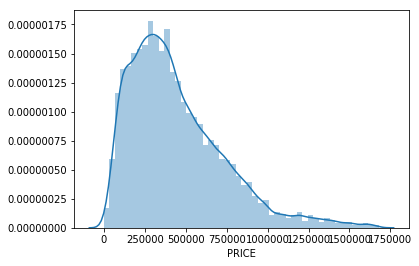

In [45]:
sns.distplot(finaldf.PRICE)

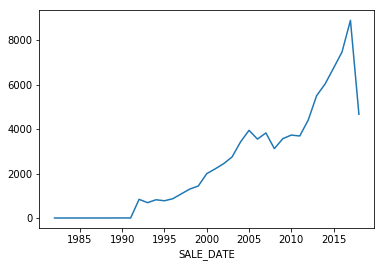

In [46]:
finaldf.SALE_DATE = finaldf.SALE_DATE.astype("datetime64")
finaldf.groupby(finaldf.SALE_DATE.dt.year)['SALE_DATE'].count().plot()

Text(0.5, 1.0, 'Number of Bedrooms per Sale')

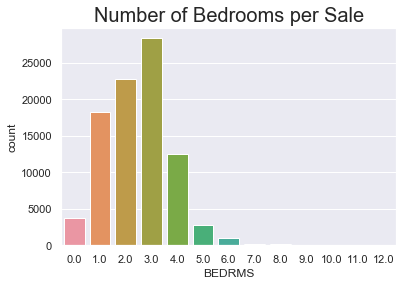

In [47]:
sns.set()
g = sns.countplot(finaldf.BEDRMS)
g.set_title('Number of Bedrooms per Sale', fontsize='20')

### What can a single person buy who lives in DC? <br>
**Assumptions:**
-  Single buyer
-  30 yr mortgage, 5% interest, 7% downpayment
-  Median salaries per tract from 2012 used with housing prices for 2010-2014
-  Median salaries per tract from 2015 used with housing prices 2015-2018
-  Can't afford: mortage cost above 32% of pre-tax income
-  Maybe afford: mortgage cost between 25% and 32% of pre-tax income
-  Can afford: mortgage cost below 25% of pre-tax income

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text yticklabel objects>)

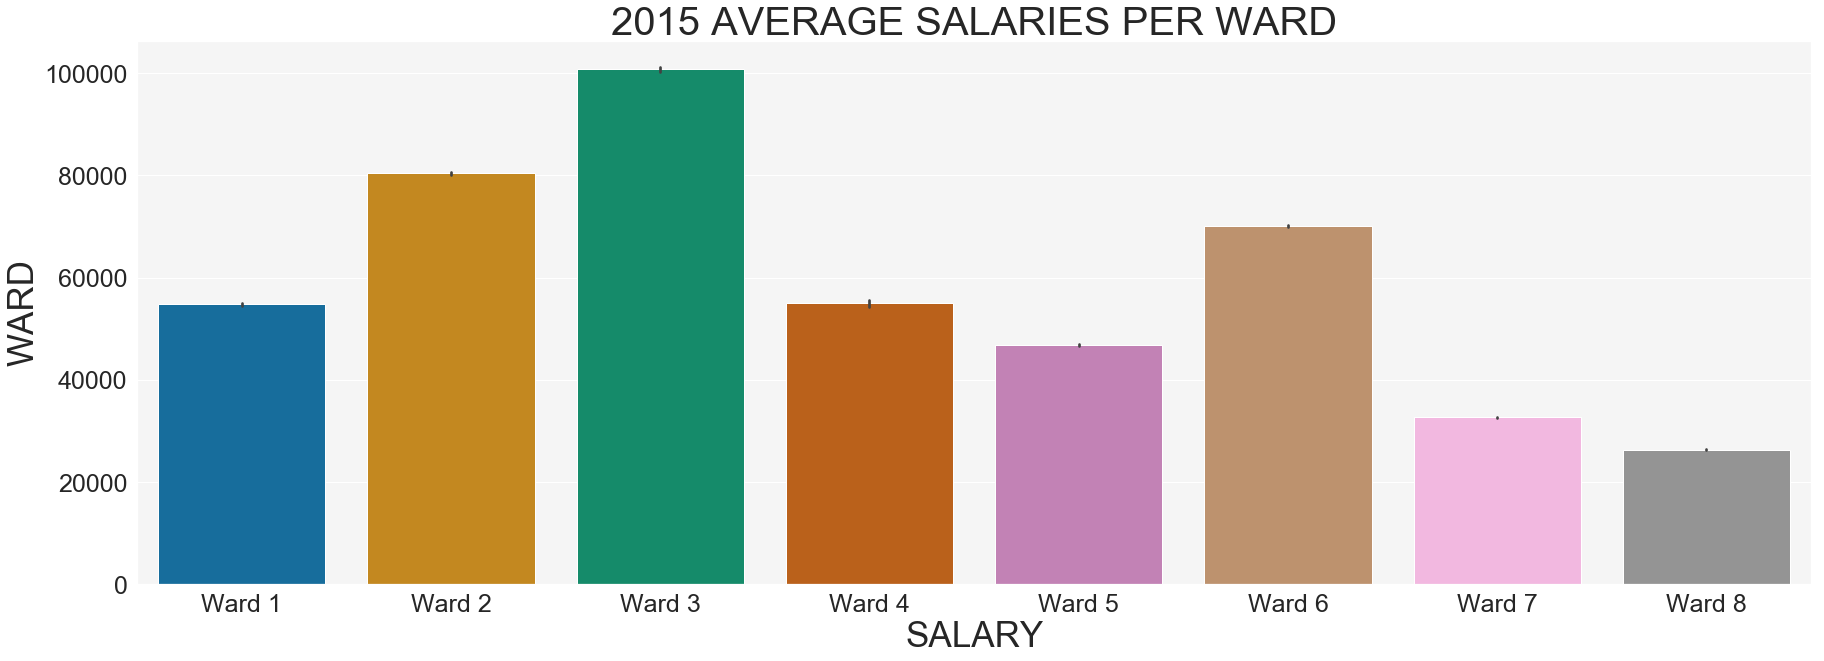

In [48]:
sns.set_style({'axes.grid' : True}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(30,10))
g = sns.barplot(x=mergedf.WARD, y=mergedf.FAGI_MEDIAN_2015, palette='colorblind')
g.set_title('2015 AVERAGE SALARIES PER WARD', fontsize='40')
plt.xlabel('SALARY', fontsize=35)
plt.ylabel('WARD', fontsize=35)
plt.xticks(size=25)
plt.yticks(size=25)

In [49]:
#mergeddf according to timeframe (first=2010-2014, second=2015-2018)
mergedf.SALE_DATE = pd.to_datetime(mergedf.SALE_DATE)
start_date= '01-01-2010'
end_date = '12-31-2014'
fmask = (mergedf.SALE_DATE >= start_date) & (mergedf.SALE_DATE <= end_date)
fmergedf = mergedf.loc[fmask]

start_date= '01-01-2015'
end_date = '12-31-2018'
smask = (mergedf.SALE_DATE >= start_date) & (mergedf.SALE_DATE <= end_date)
smergedf = mergedf.loc[smask]

#change number of bedrooms & group
fpricedf1 = fmergedf[(fmergedf['BEDRMS'] == 1)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2012']].median()
fpricedf2 = fmergedf[(fmergedf['BEDRMS'] == 2)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2012']].median()
fpricedf3 = fmergedf[(fmergedf['BEDRMS'] == 3)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2012']].median()

spricedf1 = smergedf[(smergedf['BEDRMS'] == 1)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2015']].median()
spricedf2 = smergedf[(smergedf['BEDRMS'] == 2)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2015']].median()
spricedf3 = smergedf[(smergedf['BEDRMS'] == 3)].groupby('TRACT')[['PRICE', 'LATITUDE', 'LONGITUDE', 'FAGI_MEDIAN_2015']].median()

In [50]:
#reference for calculations: https://www.thebalance.com/calculate-mortgage-315668

def mortgage(pricedf, mergedf, fagi):
    for ind, row in pricedf.iterrows():
        n = 12 * 30
        i = .05/12
        d = (((1 + i)**n)-1) / (i*(1+i)**n)
        plow = (pricedf.loc[ind, fagi] * .28 / 12)
        alow = plow * d 
        tlow = alow / .93 
        phigh = (pricedf.loc[ind, fagi] * .32 / 12) 
        ahigh = phigh * d 
        thigh = ahigh / .93 
        if (pricedf.loc[ind, 'PRICE'] > thigh):
            pricedf.loc[ind, 'AFFORD'] = 'no'
        if ((pricedf.loc[ind, 'PRICE'] <= thigh) & (pricedf.loc[ind, 'PRICE'] >= tlow)):
            pricedf.loc[ind, 'AFFORD'] = 'maybe'
        if (pricedf.loc[ind, 'PRICE'] < tlow):
            pricedf.loc[ind, 'AFFORD'] = 'yes'
        pricedf.loc[ind, 'LOW_MORTGAGE'] = plow
        pricedf.loc[ind, 'HIGH_MORTGAGE'] = phigh
    
    pricedf.reset_index(level=0, inplace=True)
    wardf = mergedf[['WARD', 'TRACT']]
    pricedf = pd.merge(pricedf, wardf, on='TRACT', how='left')           
    cataff = pd.api.types.CategoricalDtype(
            categories=["no", "maybe", "yes"], ordered=True)
    pricedf.AFFORD = pricedf.AFFORD.astype(cataff) 
    return pricedf

Text(0.5, 1.0, '2010-2014 AFFORDABILITY OF 1-BEDROOM SALES')

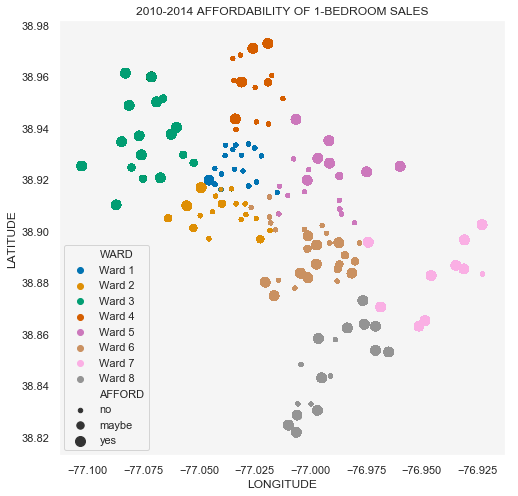

In [51]:
#apply function
Fpricedf1 = mortgage(fpricedf1, mergedf, 'FAGI_MEDIAN_2012')

#graph
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=Fpricedf1, x='LONGITUDE', y='LATITUDE', 
                    size='AFFORD', sizes = [20, 55, 100], hue='WARD', **{"alpha":.9}, 
                    edgecolor='none', palette='colorblind')
g.set_title('2010-2014 AFFORDABILITY OF 1-BEDROOM SALES')#graph

Text(0.5, 1.0, '2015-2018 AFFORDABILITY OF 1-BEDROOM SALES')

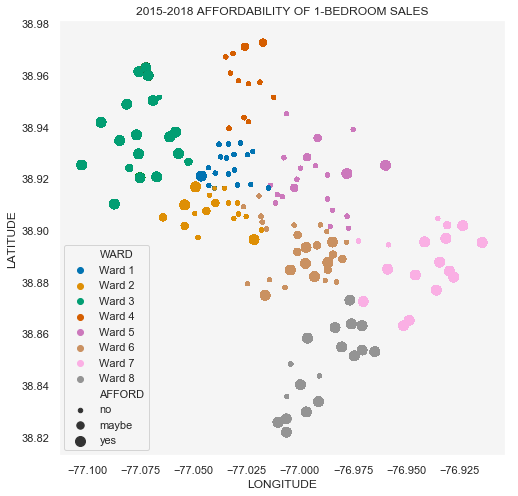

In [52]:
#apply function
Spricedf1 = mortgage(spricedf1, mergedf, 'FAGI_MEDIAN_2015')
#graph
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=Spricedf1, x='LONGITUDE', y='LATITUDE', 
                    size='AFFORD', sizes = [20, 55, 100], hue='WARD', **{"alpha":.9}, 
                    edgecolor='none', palette='colorblind')
g.set_title('2015-2018 AFFORDABILITY OF 1-BEDROOM SALES')

Text(0.5, 1.0, '2010-2014 AFFORDABILITY OF 2-BEDROOM SALES')

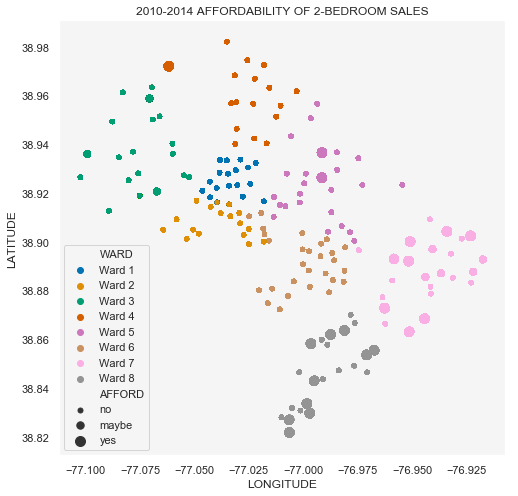

In [53]:
#apply function
Fpricedf2 = mortgage(fpricedf2, mergedf, 'FAGI_MEDIAN_2012')

#graph
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=Fpricedf2, x='LONGITUDE', y='LATITUDE', 
                    size='AFFORD', sizes = [25, 55, 100], hue='WARD', **{"alpha":.9}, 
                    edgecolor='none', palette='colorblind')
g.set_title('2010-2014 AFFORDABILITY OF 2-BEDROOM SALES')

Text(0.5, 1.0, '2015-2018 AFFORDABILITY OF 2-BEDROOM SALES')

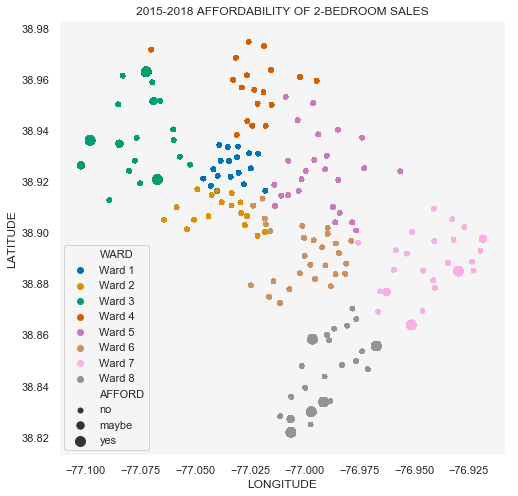

In [54]:
#apply function
Spricedf2 = mortgage(spricedf2, mergedf, 'FAGI_MEDIAN_2015')

#graph
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=Spricedf2, x='LONGITUDE', y='LATITUDE', size='AFFORD',
                    hue='WARD', **{"alpha":.9}, sizes=[25, 55, 100], 
                    edgecolor='none', palette='colorblind')
g.set_title('2015-2018 AFFORDABILITY OF 2-BEDROOM SALES')

### Price increases for units with different numbers of bedrooms:

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


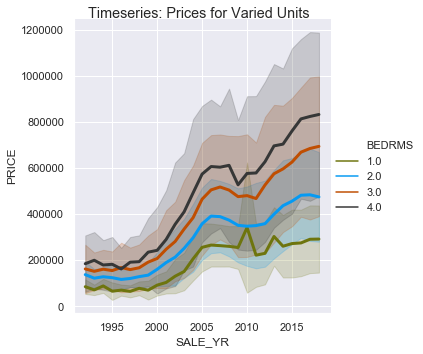

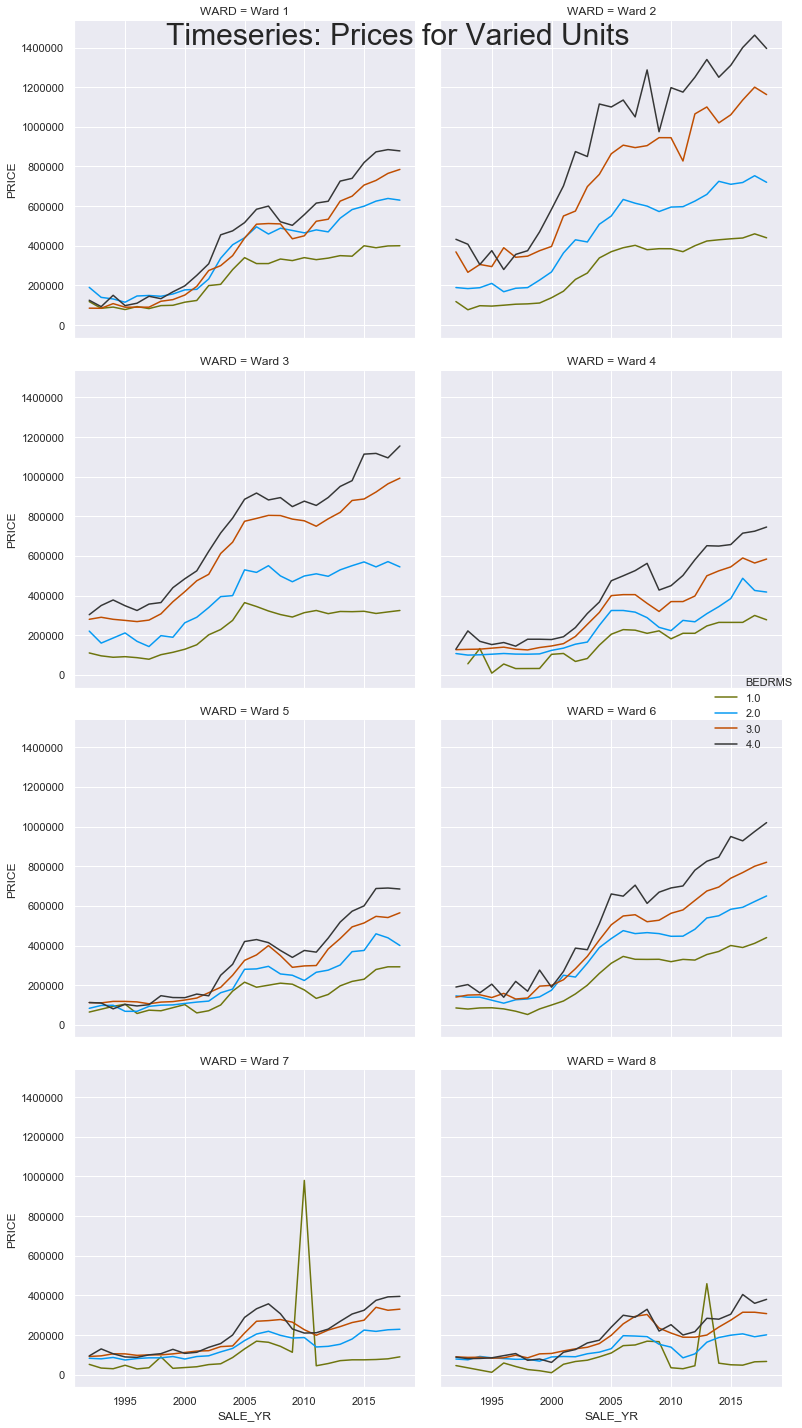

In [55]:
#https://www.programcreek.com/python/example/96204/seaborn.FacetGrid
brdf = finaldf[(finaldf['BEDRMS'] > 0) & (finaldf['BEDRMS'] <= 4)]

start_date= '01-01-1992'
end_date = '12-31-2018'
mask = (brdf.SALE_DATE >= start_date) & (brdf.SALE_DATE <= end_date)
brdf = brdf.loc[mask]

###
bdf = brdf[['WARD', 'BEDRMS', 'SALE_DATE', 'PRICE']]
SALE_YR = brdf.SALE_DATE.dt.strftime('%Y')
bdf.loc[:, 'SALE_YR'] = SALE_YR
bdf = bdf.drop(['SALE_DATE'], axis=1)

bdf.WARD = bdf.WARD.astype('category')
bdf.SALE_YR = bdf.SALE_YR.astype('int')

#groupby to get median price 
bdf = bdf.groupby(['WARD', 'SALE_YR','BEDRMS'])['PRICE'].median()
bdf = bdf.reset_index(level=['WARD', 'SALE_YR', 'BEDRMS'])

col_list = ['olive', 'azure', 'burnt orange', 'dark grey']
sns.set()
g = sns.relplot(data=bdf, x='SALE_YR', y='PRICE', hue='BEDRMS',
               palette=sns.xkcd_palette(col_list), kind='line', markers=True, ci="sd", linewidth=3)
g.fig.suptitle("Timeseries: Prices for Varied Units")

#plot
col_list = ['olive', 'azure', 'burnt orange', 'dark grey']
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.set()
g = sns.relplot(data=bdf, x='SALE_YR', y='PRICE', col='WARD', col_wrap=2, hue='BEDRMS',
               palette=sns.xkcd_palette(col_list), kind='line', markers=True, ci="sd")
g.fig.suptitle("Timeseries: Prices for Varied Units", size=30)

plt.tight_layout()

Text(0.5, 0.98, 'PRICES, DEPENDENT ON WARD AND BEDROOMS')

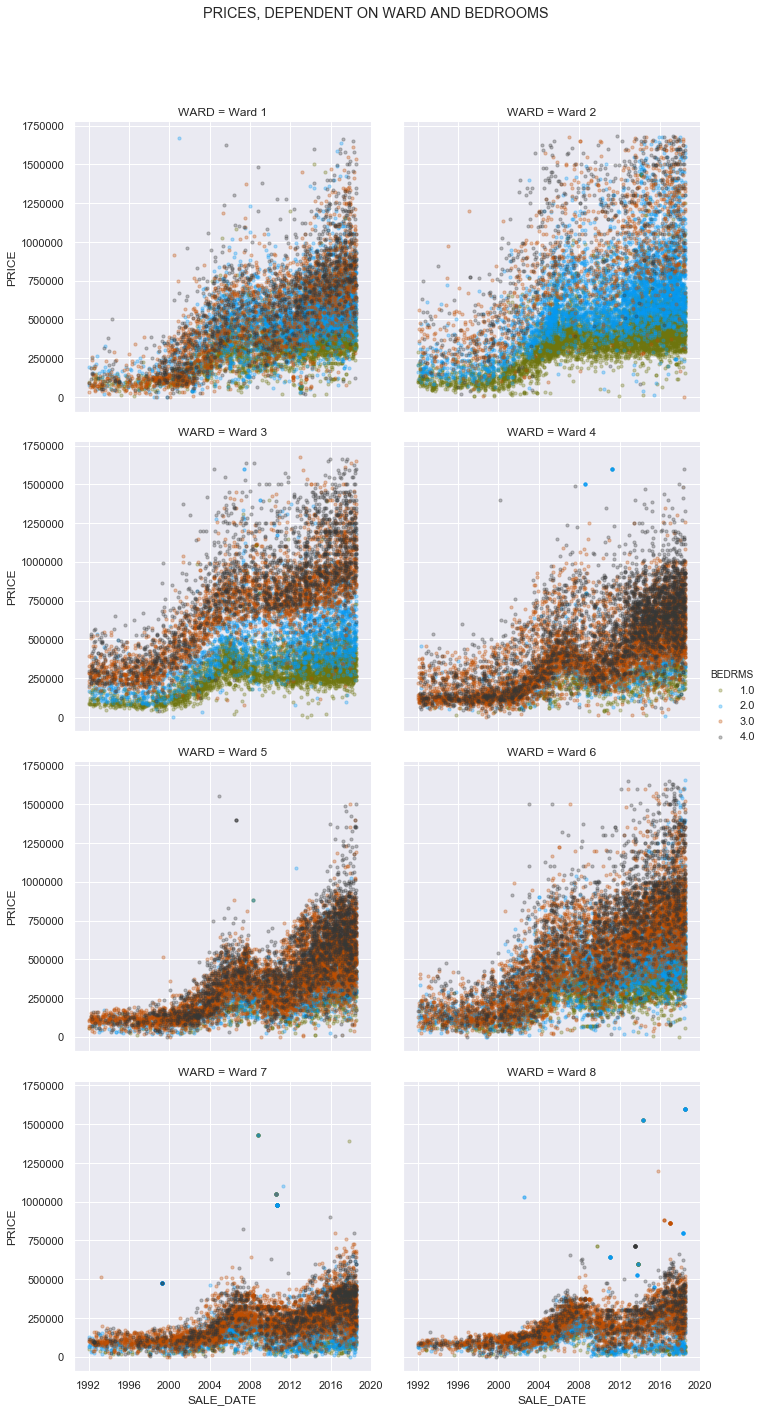

In [56]:
#https://www.programcreek.com/python/example/96204/seaborn.FacetGrid

brdf = finaldf[(finaldf['BEDRMS'] > 0) & (finaldf['BEDRMS'] <= 4)]

start_date= '01-01-1992'
end_date = '12-31-2018'
mask = (brdf.SALE_DATE >= start_date) & (brdf.SALE_DATE <= end_date)
brdf = brdf.loc[mask]

#
col_list = ['olive', 'azure', 'burnt orange', 'dark grey']
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)

g = sns.FacetGrid(
        brdf,
        col='WARD',
        hue='BEDRMS',
        legend_out=True,
        height=5,
        palette=sns.xkcd_palette(col_list),
        col_wrap=2,
    )

m = g.map(plt.scatter, 'SALE_DATE', 'PRICE', alpha=0.3, s=10).add_legend()
plt.subplots_adjust(top=.9)
g.fig.suptitle('PRICES, DEPENDENT ON WARD AND BEDROOMS')


**Takeaways:** <br>
-  Wards 2 and 3 have the highest difference in price between small and large units.
-  Wards 7 & 8: since 2010, prices for 2, 3, and 4 bedrooms have been increasing steadily, but remaining affordable
-  Prices of units are proportional to incomes in different wards.

### WARD: Percentage of real estate value sold per year

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

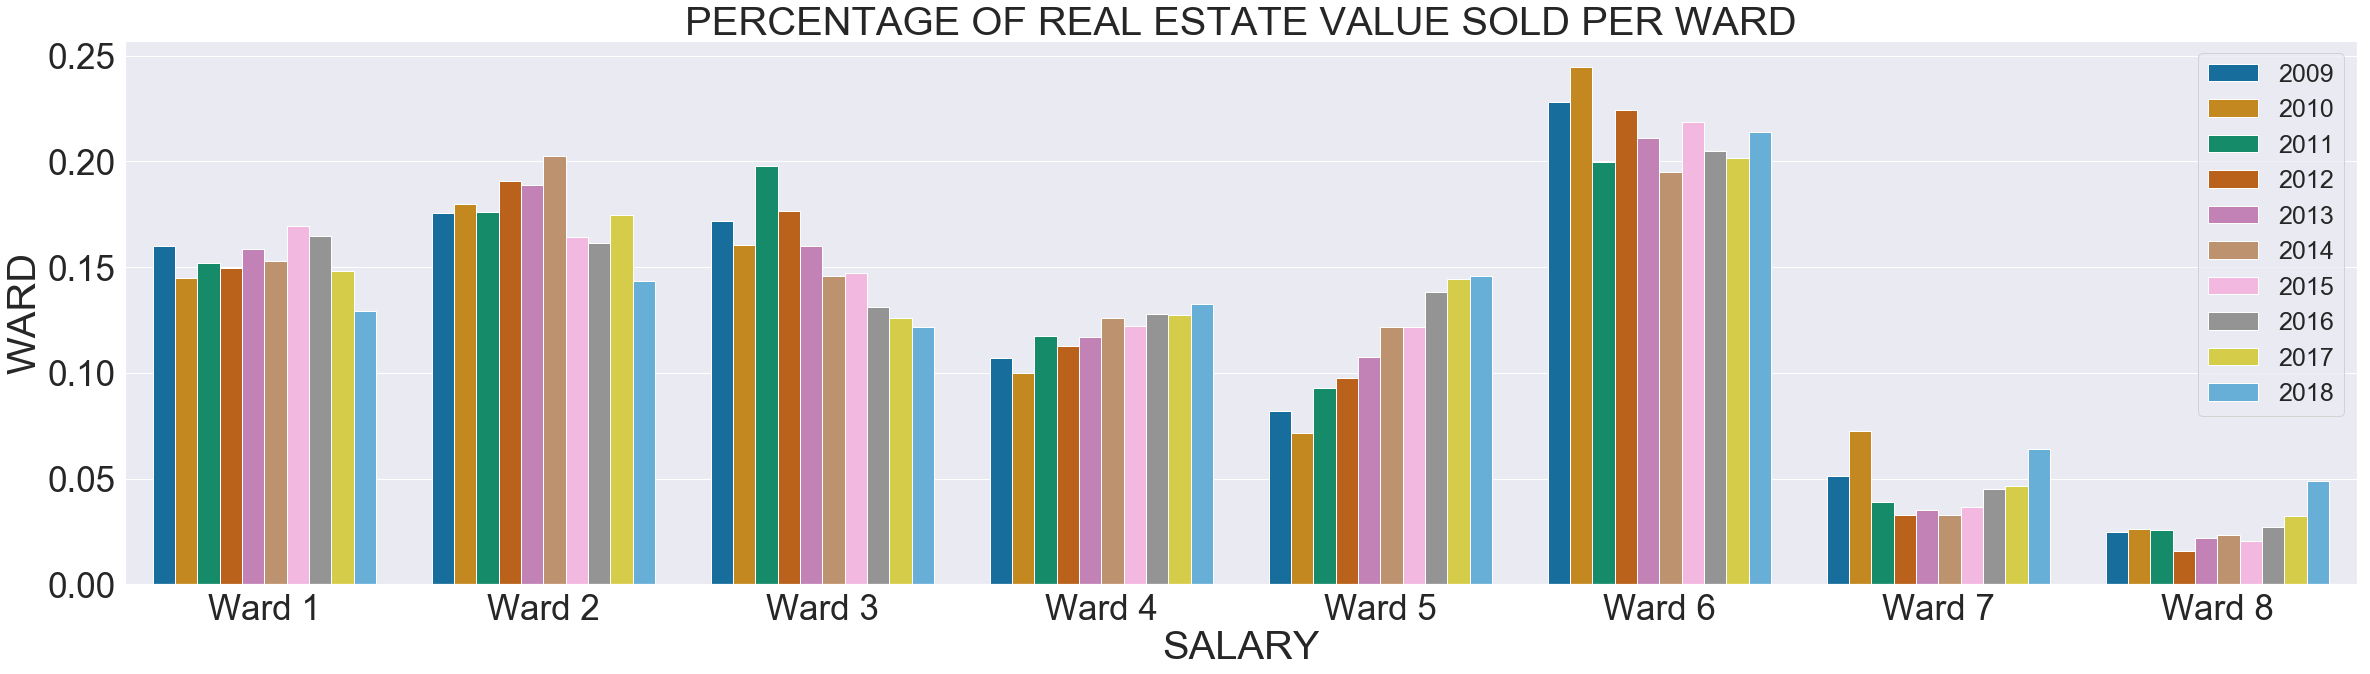

In [57]:
persdf = finaldf[['WARD', 'PRICE', 'SALE_DATE']]

start_date = '01-01-2009'
end_date = '12-31-2018'
mask = (persdf.SALE_DATE >= start_date) & (persdf.SALE_DATE <= end_date)
persdf = persdf.loc[mask]

SALE_YR = persdf.SALE_DATE.dt.strftime('%Y')
persdf.loc[:, 'SALE_YR'] = SALE_YR
persdf = persdf.drop(['SALE_DATE'], axis=1)

#sum of prices
persdf = persdf.groupby(['SALE_YR', 'WARD']).sum()

sums = persdf.sum(level=['SALE_YR'])
sums['SUMS'] = sums['PRICE']
sums = sums.drop(['PRICE'], axis=1)

tdf = persdf.reset_index().merge(sums, how="left", on='SALE_YR').set_index(['SALE_YR', 'WARD'])

PERC_YR = [(tdf.loc[ind,'PRICE'] / tdf.loc[ind, 'SUMS']) for ind, row in tdf.iterrows()]
tdf['PERC_YR']=PERC_YR

tdf.reset_index(level=['SALE_YR', 'WARD'], inplace=True)

sns.set()
plt.figure(figsize=(40,10))
ax = sns.barplot(data=tdf, x='WARD', y='PERC_YR', hue='SALE_YR', palette='colorblind', ci=0)
ax.set_title('PERCENTAGE OF REAL ESTATE VALUE SOLD PER WARD', fontsize='40')
plt.xticks(size=35)
plt.yticks(size=35)
plt.xlabel('SALARY', fontsize=40)
plt.ylabel('WARD', fontsize=40)
plt.legend(fontsize=25)
plt.tight_layout

**Takeaways:**
-  Ward 1: steep decline in percentage real estate value from 2015-2018
-  Ward 2: steep incline in percentage of sales from 2009-2014, steep decline from 2014-2018
-  Ward 3: steep increase in percentage os sales from 2010-2011, then steady decline
-  Ward 6: very high percentage of sales in 2009-2010, consistently high from then on 
-  Wards 7 and 8: large increase in percentage of sales from 2014-2018

### WARD: Percentage of real estate sales per year

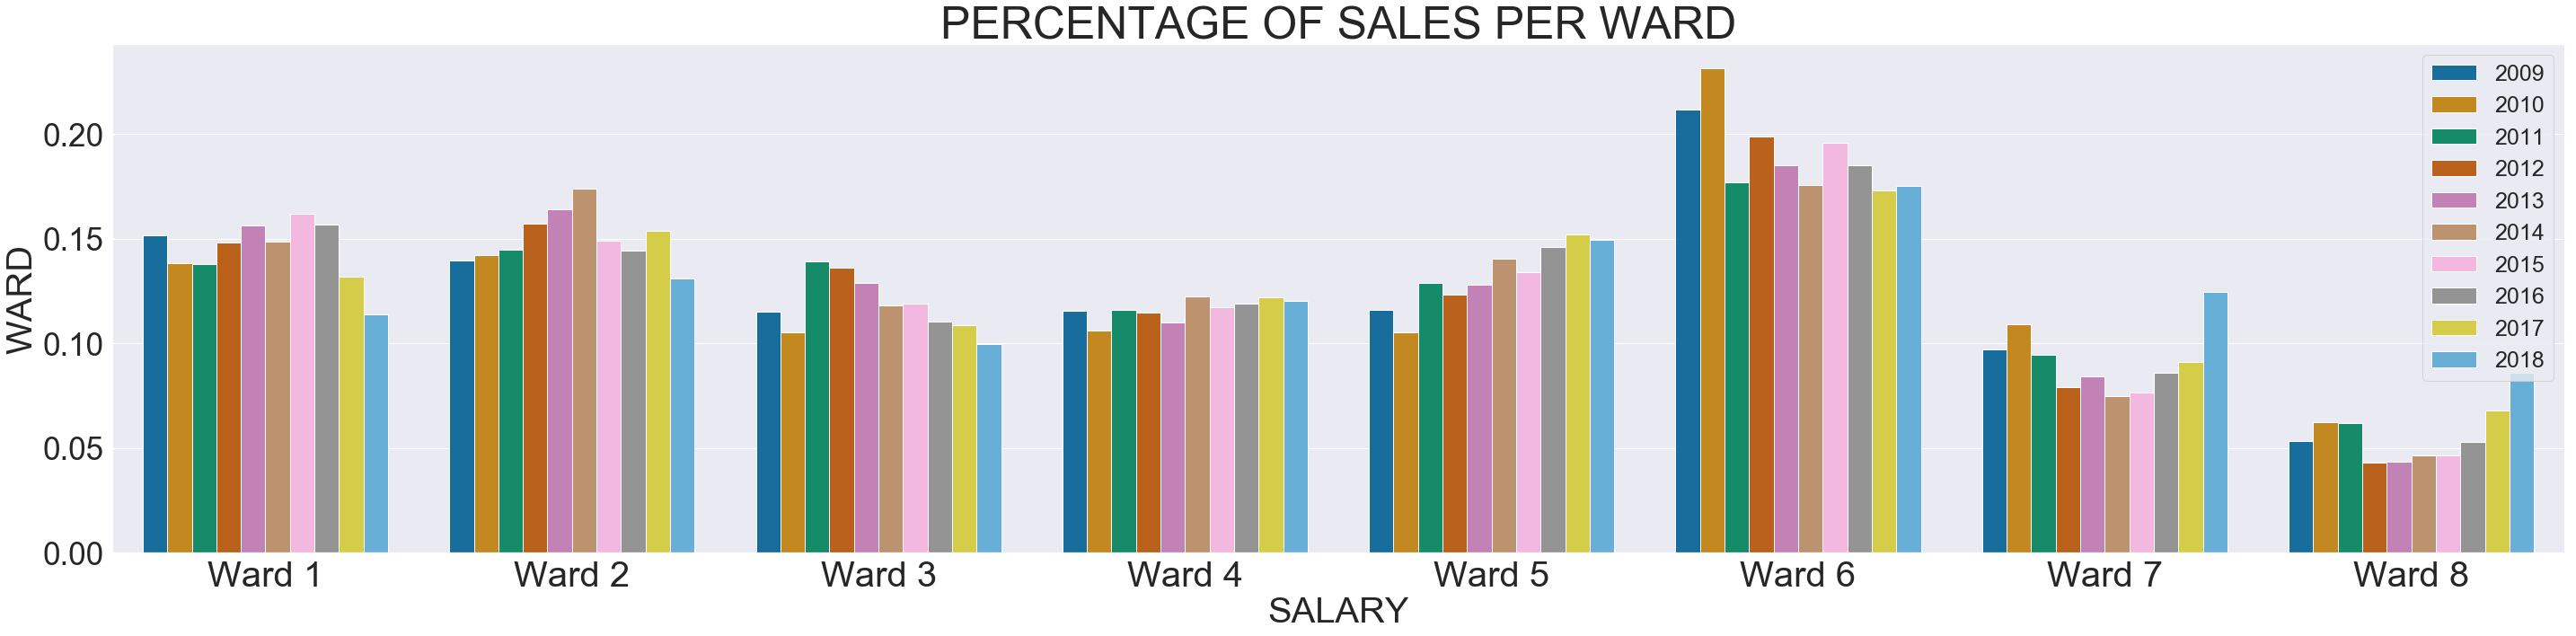

In [58]:
persdf = finaldf[['WARD', 'PRICE', 'SALE_DATE']]

start_date = '01-01-2009'
end_date = '12-31-2018'
mask = (persdf.SALE_DATE >= start_date) & (persdf.SALE_DATE <= end_date)
persdf = persdf.loc[mask]

SALE_YR = persdf.SALE_DATE.dt.strftime('%Y')
persdf.loc[:, 'SALE_YR'] = SALE_YR
persdf = persdf.drop(['SALE_DATE'], axis=1)

#count of prices
persdf = persdf.groupby(['SALE_YR', 'WARD']).count()

#sums['SUMS'] = counts per year
#tdf['PRICE'] = counts of sales per ward
sums = persdf.sum(level=['SALE_YR'])
sums['SUMS'] = sums['PRICE']
sums = sums.drop(['PRICE'], axis=1)

tdf = persdf.reset_index().merge(sums, how="left", on='SALE_YR').set_index(['SALE_YR', 'WARD'])

#getting percentage of each ward() from totals(SUMS)
PERC_YR = [(tdf.loc[ind,'PRICE'] / tdf.loc[ind, 'SUMS']) for ind, row in tdf.iterrows()]
tdf['PERC_YR']=PERC_YR

tdf.reset_index(level=['SALE_YR', 'WARD'], inplace=True)

sns.set()
plt.figure(figsize=(40,10))
ax = sns.barplot(data=tdf, x='WARD', y='PERC_YR', hue='SALE_YR', palette='colorblind', ci=0)
plt.xticks(size=40)
plt.yticks(size=35)
plt.xlabel('SALARY', fontsize=40)
plt.ylabel('WARD', fontsize=40)
ax.set_title('PERCENTAGE OF SALES PER WARD', fontsize='50')
plt.legend(fontsize=25)
plt.tight_layout()

**Takeaways:**
-  Ward 1: steep decline in percentage of sales from 2015-2018
-  Ward 2: steep incline in percentage of sales from 2009-2014, steep decline from 2014-2018
-  Ward 3: steep increase in percentage os sales from 2010-2011, then steady decline
-  Ward 6: very high percentage of sales in 2009-2010, consistently high from then on
-  Wards 7 and 8: large increase in percentage of sales from 2014-2018 <br>

Proportions are consistent with Percentage of Real Estate value except for the following:
-  Ward 7 and 8 have higher proportion of sales than value.
-  Ward 3 and 5 had more dramatic changes in value than percentage of sales

### Neighborhood: Real estate sales per year 

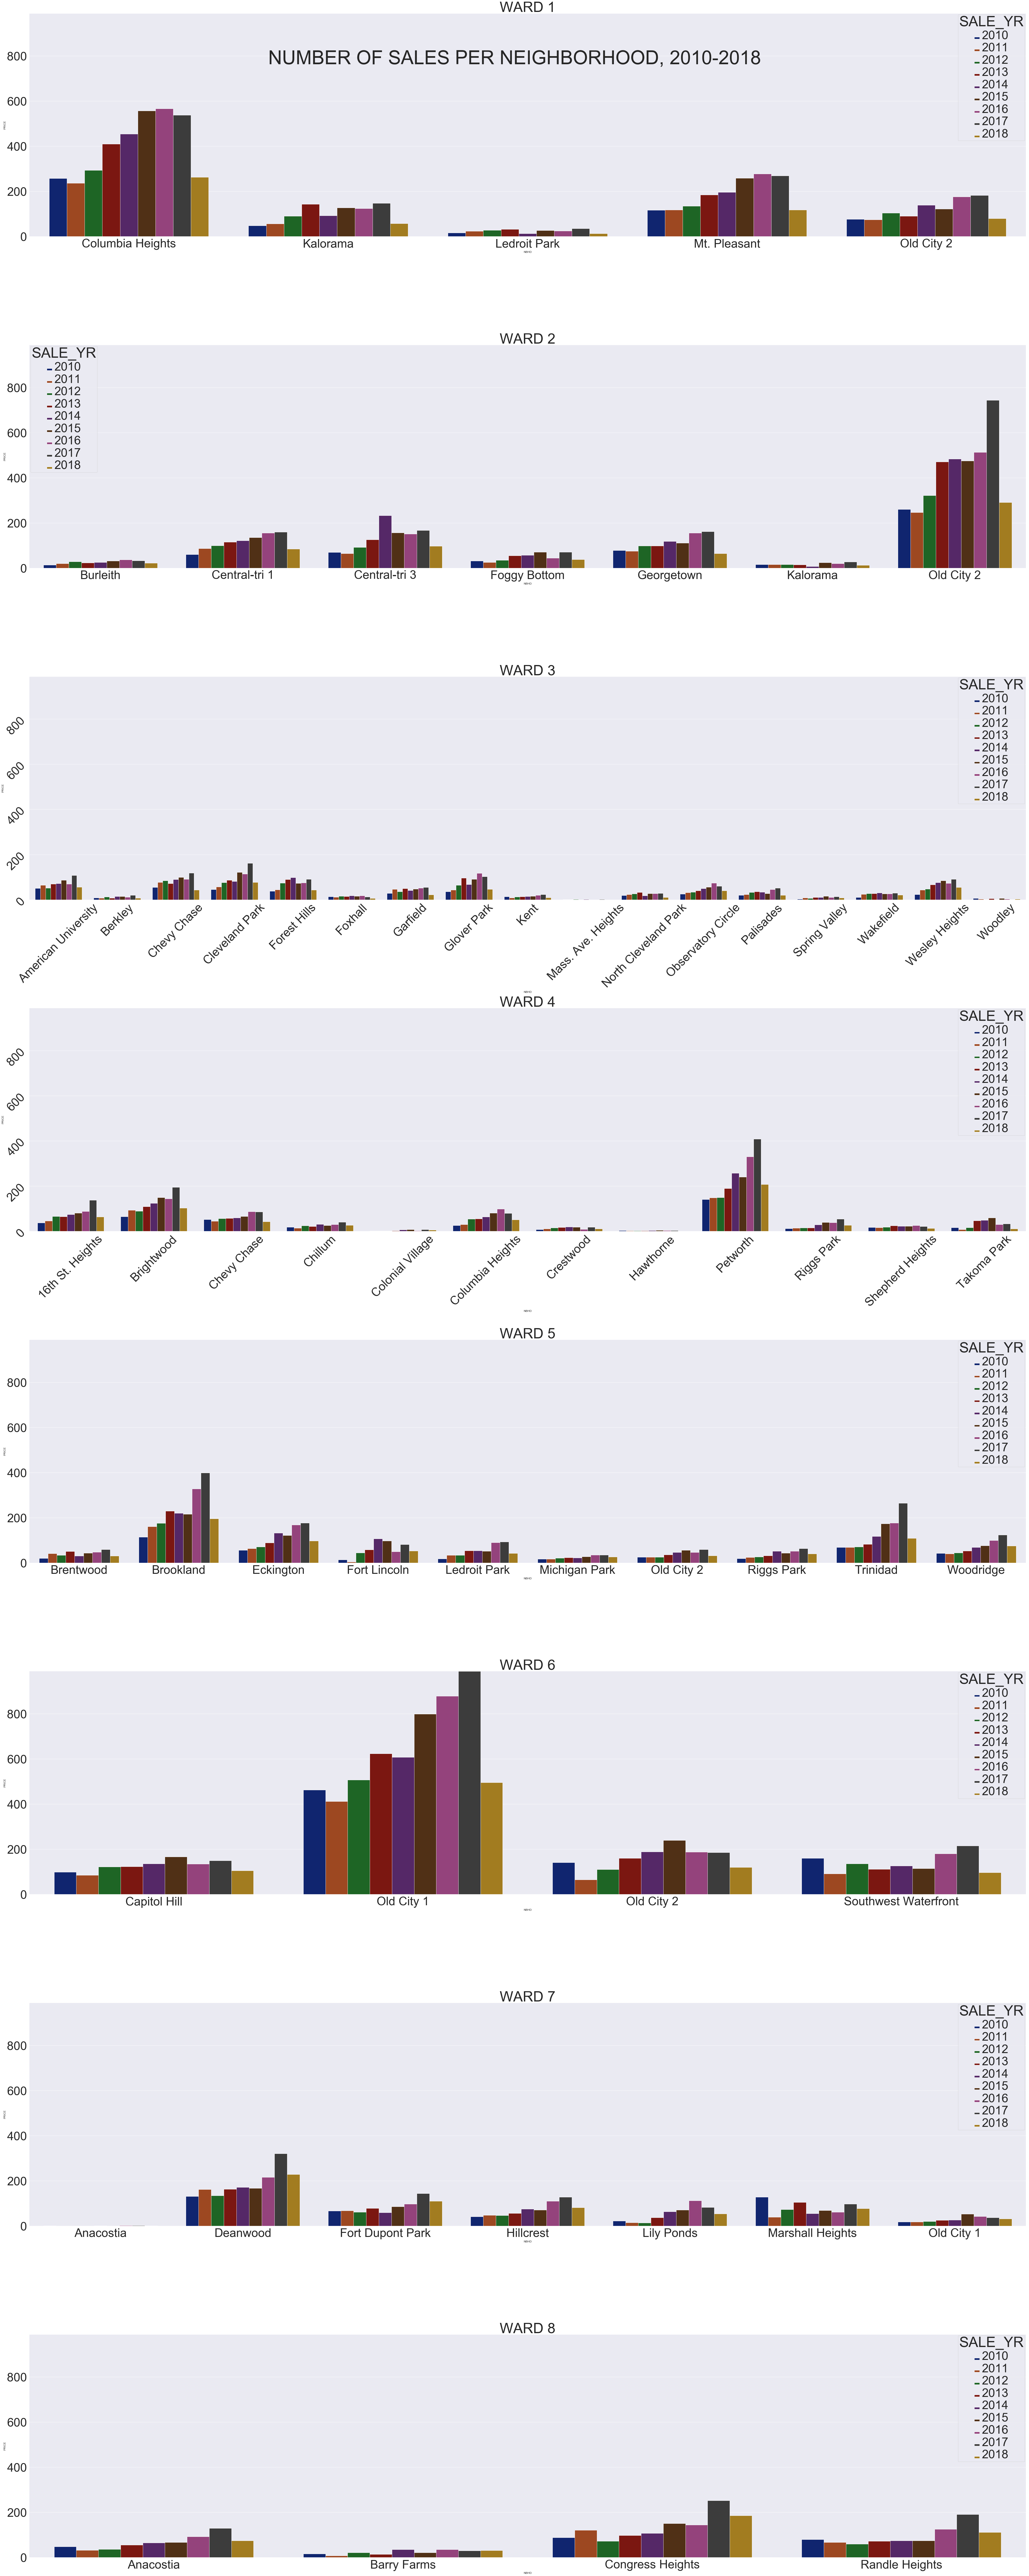

In [59]:
saleyrdf = finaldf[['WARD', 'NBHD', 'SALE_DATE', 'PRICE']]
pd.to_datetime(saleyrdf['SALE_DATE'])

start_date= '01-01-2010'
end_date = '12-31-2018'
mask = (saleyrdf.SALE_DATE >= start_date) & (saleyrdf.SALE_DATE <= end_date)
saleyrdf = saleyrdf.loc[mask]

SALE_YR = saleyrdf.SALE_DATE.dt.strftime('%Y')
saleyrdf.loc[:, 'SALE_YR'] = SALE_YR
saleyrdf = saleyrdf.drop(['SALE_DATE'], axis=1)

#grouping

sygrouped = saleyrdf.groupby(['WARD', saleyrdf.NBHD.cat.remove_unused_categories(), 'SALE_YR']).count().dropna()
sygrouped = sygrouped.drop(['NBHD'], axis=1)
sygrouped = sygrouped.reset_index()

sygrouped['NBHD'] = sygrouped['NBHD'].cat.rename_categories({'16th Street Heights': '16th St. Heights', 
                                  'Massachusetts Avenue Heights': 'Mass. Ave. Heights'}, inplace=False)

#creating individual dataframes to remove neighborhoods not in each ward

sygone = sygrouped[(sygrouped.WARD == 'Ward 1')]
sygtwo = sygrouped[(sygrouped.WARD == 'Ward 2')]
sygthree = sygrouped[(sygrouped.WARD == 'Ward 3')]
sygfour = sygrouped[(sygrouped.WARD == 'Ward 4')]
sygfive = sygrouped[(sygrouped.WARD == 'Ward 5')]
sygsix = sygrouped[(sygrouped.WARD == 'Ward 6')]
sygseven = sygrouped[(sygrouped.WARD == 'Ward 7')]
sygeight = sygrouped[(sygrouped.WARD == 'Ward 8')]

def remove(df):
    df.NBHD.cat = df.NBHD.cat.remove_unused_categories()
[remove(df) for df in [sygone, sygtwo, sygthree, sygfour, sygfive, sygsix, sygseven, sygeight]]

#graph

fig, axarr = plt.subplots(8, 1, sharey=True, figsize=(60, 150))
fig.suptitle('NUMBER OF SALES PER NEIGHBORHOOD, 2010-2018', fontsize=80)   
for i in range(8):
    axarr[i].set_ylim(0, ((max(sygrouped.PRICE))+1))
       
zero = sns.barplot(hue=sygone.SALE_YR, x=sygone.NBHD, y=sygone.PRICE, ax=axarr[0], palette='dark')
axarr[0].set_title('WARD 1', size=60)
zero.tick_params(labelsize=50)
plt.yticks(size=40)

one= sns.barplot(hue=sygtwo.SALE_YR, x=sygtwo.NBHD, y=sygtwo.PRICE, ax=axarr[1], palette='dark')
axarr[1].set_title('WARD 2', size=60)
one.tick_params(labelsize=50)
plt.yticks(size=40)

three = sns.barplot(hue=sygthree.SALE_YR, x=sygthree.NBHD, y=sygthree.PRICE, ax=axarr[2], palette='dark')
axarr[2].set_title('WARD 3', size=60)
three.tick_params(labelsize=50, rotation=45)
plt.yticks(size=40)

four = sns.barplot(hue=sygfour.SALE_YR, x=sygfour.NBHD, y=sygfour.PRICE, ax=axarr[3], palette='dark')
axarr[3].set_title('WARD 4', size=60)
four.tick_params(labelsize=50, rotation=45)

five = sns.barplot(hue=sygfive.SALE_YR, x=sygfive.NBHD, y=sygfive.PRICE, ax=axarr[4], palette='dark')
axarr[4].set_title('WARD 5', size=60)
five.tick_params(labelsize=50)

six = sns.barplot(hue=sygsix.SALE_YR, x=sygsix.NBHD, y=sygsix.PRICE, ax=axarr[5], palette='dark')
axarr[5].set_title('WARD 6', size=60)
six.tick_params(labelsize=50)

seven = sns.barplot(hue=sygseven.SALE_YR, x=sygseven.NBHD, y=sygseven.PRICE, ax=axarr[6], palette='dark')
axarr[6].set_title('WARD 7', size=60)
seven.tick_params(labelsize=50)

eight = sns.barplot(hue=sygeight.SALE_YR, x=sygeight.NBHD, y=sygeight.PRICE, ax=axarr[7], palette='dark')
axarr[7].set_title('WARD 8', size=60)
eight.tick_params(labelsize=50)

for i in range(8):
    plt.setp(axarr[i].get_legend().get_texts(), fontsize='50') 
    plt.setp(axarr[i].get_legend().get_title(), fontsize='60')
    
plt.tight_layout()

###  Neighborhood: Percent real estate value sold per year

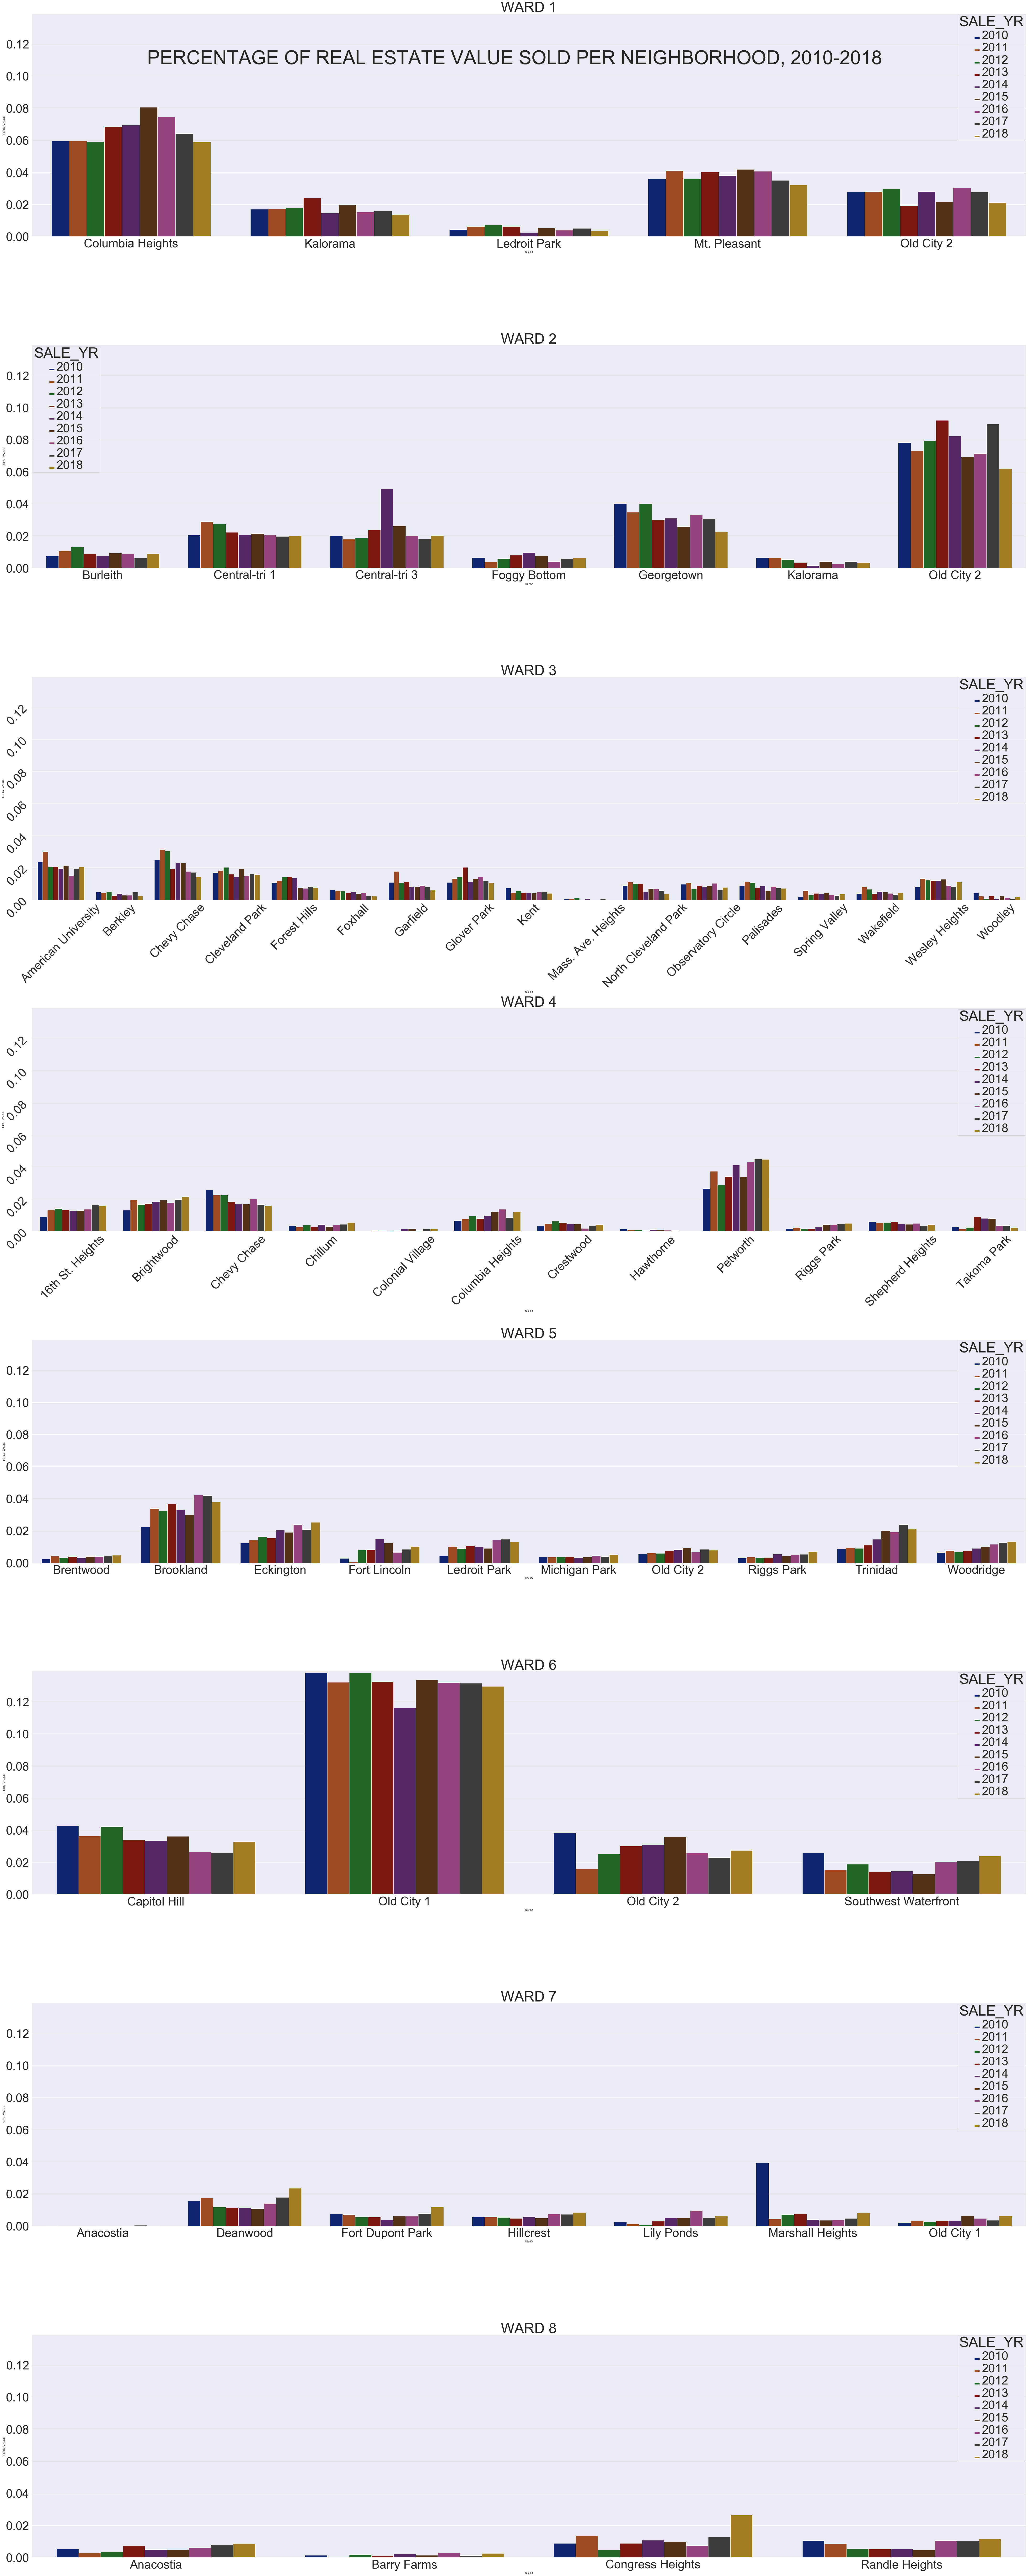

In [60]:
saleyrdf = finaldf[['WARD', 'NBHD', 'SALE_DATE', 'PRICE']]
pd.to_datetime(saleyrdf['SALE_DATE'])

start_date= '01-01-2010'
end_date = '12-31-2018'
mask = (saleyrdf.SALE_DATE >= start_date) & (saleyrdf.SALE_DATE <= end_date)
saleyrdf = saleyrdf.loc[mask]

SALE_YR = saleyrdf.SALE_DATE.dt.strftime('%Y')
saleyrdf.loc[:, 'SALE_YR'] = SALE_YR
saleyrdf = saleyrdf.drop(['SALE_DATE'], axis=1)

#grouping and calculating 
sygrouped = saleyrdf.groupby(['SALE_YR', 'WARD', saleyrdf.NBHD.cat.remove_unused_categories(),]).sum().dropna()

sums = sygrouped.sum(level=['SALE_YR'])
sums['SUMS'] = sums['PRICE']
sums = sums.drop(['PRICE'], axis=1)

sygrouped = sygrouped.reset_index().merge(sums, how="left", on='SALE_YR').set_index(['WARD', 'NBHD', 'SALE_YR'])
sygrouped['PERC_VALUE'] = sygrouped['PRICE']/sygrouped['SUMS']
sygrouped.reset_index(level=['WARD', 'NBHD', 'SALE_YR', 'WARD'], inplace=True)
sygrouped['NBHD'] = sygrouped['NBHD'].cat.rename_categories({'16th Street Heights': '16th St. Heights', 
                                  'Massachusetts Avenue Heights': 'Mass. Ave. Heights'}, inplace=False)

#creating individual dataframes to remove neighborhoods not in each ward
sygone = sygrouped[(sygrouped.WARD == 'Ward 1')]
sygtwo = sygrouped[(sygrouped.WARD == 'Ward 2')]
sygthree = sygrouped[(sygrouped.WARD == 'Ward 3')]
sygfour = sygrouped[(sygrouped.WARD == 'Ward 4')]
sygfive = sygrouped[(sygrouped.WARD == 'Ward 5')]
sygsix = sygrouped[(sygrouped.WARD == 'Ward 6')]
sygseven = sygrouped[(sygrouped.WARD == 'Ward 7')]
sygeight = sygrouped[(sygrouped.WARD == 'Ward 8')]

def remove(df):
    df.NBHD.cat = df.NBHD.cat.remove_unused_categories()
[remove(df) for df in [sygone, sygtwo, sygthree, sygfour, sygfive, sygsix, sygseven, sygeight]]

#graphing
fig, axarr = plt.subplots(8, 1, sharey=True, figsize=(60, 150))
fig.suptitle('PERCENTAGE OF REAL ESTATE VALUE SOLD PER NEIGHBORHOOD, 2010-2018', fontsize=80)
for i in range(8):
    axarr[i].set_ylim(0, ((max(sygrouped.PERC_VALUE))+.001))
    
zero = sns.barplot(hue=sygone.SALE_YR, x=sygone.NBHD, y=sygone.PERC_VALUE, ax=axarr[0], palette='dark')
axarr[0].set_title('WARD 1', size=60)
zero.tick_params(labelsize=50)
plt.yticks(size=40)

one= sns.barplot(hue=sygtwo.SALE_YR, x=sygtwo.NBHD, y=sygtwo.PERC_VALUE, ax=axarr[1], palette='dark')
axarr[1].set_title('WARD 2', size=60)
one.tick_params(labelsize=50)
plt.yticks(size=40)

three = sns.barplot(hue=sygthree.SALE_YR, x=sygthree.NBHD, y=sygthree.PERC_VALUE, ax=axarr[2], palette='dark')
axarr[2].set_title('WARD 3', size=60)
three.tick_params(labelsize=50, rotation=45)
plt.yticks(size=40)

four = sns.barplot(hue=sygfour.SALE_YR, x=sygfour.NBHD, y=sygfour.PERC_VALUE, ax=axarr[3], palette='dark')
axarr[3].set_title('WARD 4', size=60)
four.tick_params(labelsize=50, rotation=45)

five = sns.barplot(hue=sygfive.SALE_YR, x=sygfive.NBHD, y=sygfive.PERC_VALUE, ax=axarr[4], palette='dark')
axarr[4].set_title('WARD 5', size=60)
five.tick_params(labelsize=50)

six = sns.barplot(hue=sygsix.SALE_YR, x=sygsix.NBHD, y=sygsix.PERC_VALUE, ax=axarr[5], palette='dark')
axarr[5].set_title('WARD 6', size=60)
six.tick_params(labelsize=50)

seven = sns.barplot(hue=sygseven.SALE_YR, x=sygseven.NBHD, y=sygseven.PERC_VALUE, ax=axarr[6], palette='dark')
axarr[6].set_title('WARD 7', size=60)
seven.tick_params(labelsize=50)

eight = sns.barplot(hue=sygeight.SALE_YR, x=sygeight.NBHD, y=sygeight.PERC_VALUE, ax=axarr[7], palette='dark')
axarr[7].set_title('WARD 8', size=60)
eight.tick_params(labelsize=50)

for i in range(8):
    plt.setp(axarr[i].get_legend().get_texts(), fontsize='50') 
    plt.setp(axarr[i].get_legend().get_title(), fontsize='60')

plt.tight_layout()

In [61]:
#creating racial columns for mergedf

racedf = census_full[['TRACT', 'POP', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP', 'OTHER', 'BLACK+', 'NTV_AMR+',
                      'ASN+', 'PAC_ISL+', 'WHITE_NONHISP', 'BLACK_NONHISP', 'NTV_AMR_NONHISP', 'ASIAN_NONHISP', 'PAC_ISL_NONHISP',
                      'OTHER_NONHISP', 'BLACK+_NONHISP', 'NTV_AMR+_NONHISP', 'ASIAN+_NONHISP', 'PAC_ISL+_NONHISP']]
racelist = ['WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP', 'OTHER', 'BLACK+', 'NTV_AMR+',
                 'ASN+', 'PAC_ISL+', 'WHITE_NONHISP', 'BLACK_NONHISP', 'NTV_AMR_NONHISP', 'ASIAN_NONHISP', 'PAC_ISL_NONHISP',
                      'OTHER_NONHISP', 'BLACK+_NONHISP', 'NTV_AMR+_NONHISP', 'ASIAN+_NONHISP', 'PAC_ISL+_NONHISP']

racedf['SEGREGATION_PERC'] = racedf[racelist].max(axis=1) / racedf['POP'] 
     
racedf['MAJORITY_RACE'] = racedf[racelist].idxmax(axis=1)  
    
SEGREGATION_LEVEL = []
for ind, row in racedf.iterrows():
    if racedf.loc[ind, 'SEGREGATION_PERC']>= .85:
        SEGREGATION_LEVEL.append("high")
    if (racedf.loc[ind, 'SEGREGATION_PERC'] >= .70) & (racedf.loc[ind, 'SEGREGATION_PERC'] < .85):
        SEGREGATION_LEVEL.append("moderate")
    if racedf.loc[ind, 'SEGREGATION_PERC'] < .70:
        SEGREGATION_LEVEL.append("low")
racedf['SEGREGATION_LEVEL'] = SEGREGATION_LEVEL

mergedf = pd.merge(mergedf, racedf[['SEGREGATION_PERC','SEGREGATION_LEVEL', 'MAJORITY_RACE', 'TRACT']] , on='TRACT', how='inner')
mergedf = mergedf.drop(['key_0'], axis=1)
#mergedf.head()

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [62]:
#developing racedf to easily plot information about "tracts", as opposed to "sales"

racecat = pd.api.types.CategoricalDtype(
            categories=["BLACK", "HISP", "WHITE"], ordered=True)
racedf['MAJORITY_RACE'] = racedf['MAJORITY_RACE'].astype(racecat)
mergedf['MAJORITY_RACE'] = mergedf['MAJORITY_RACE'].astype(racecat)   
    
segcat = pd.api.types.CategoricalDtype(
            categories=["high", "moderate", "low"], ordered=True)
racedf.SEGREGATION_LEVEL = racedf.SEGREGATION_LEVEL.astype(segcat)
mergedf.SEGREGATION_LEVEL = mergedf.SEGREGATION_LEVEL.astype(segcat) 

lgroup = mergedf[['LATITUDE', 'LONGITUDE', 'TRACT']].groupby('TRACT').mean()
lgroup = lgroup.reset_index(level=0)
racedf = pd.merge(racedf, lgroup, on='TRACT', how='left')
racedf = pd.merge(racedf, mergedf[['WARD', 'TRACT', 'QUADRANT']], on='TRACT', how='left')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5, 1.0, 'SEGREGATION IN DC')

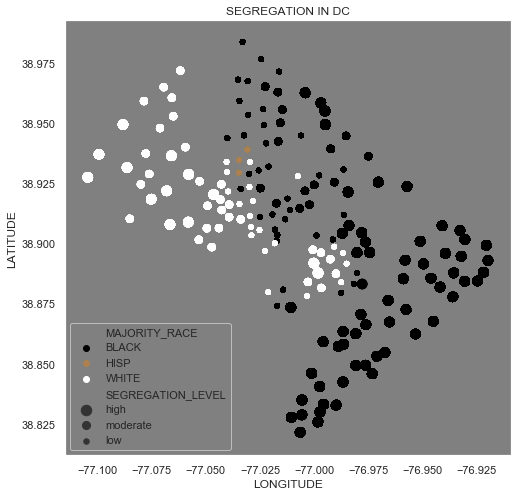

In [63]:
race = ['black', 'light brown', 'white']
race_palette = sns.xkcd_palette(race)
sns.set_palette(race_palette)
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'gray'})

plt.figure(figsize=(8,8))
g = sns.scatterplot(data=racedf, x='LONGITUDE', y='LATITUDE',  
                    size='SEGREGATION_LEVEL', sizes = [110, 65, 30], 
                    hue='MAJORITY_RACE', **{"alpha":.9}, palette=sns.xkcd_palette(race), 
                    edgecolor='none')
g.set_title('SEGREGATION IN DC')

### Takeaways:
-  Most white-segregated wards in NW
-  Most black-segregated wards in SE
-  Most integrated area along longitudinal center. 

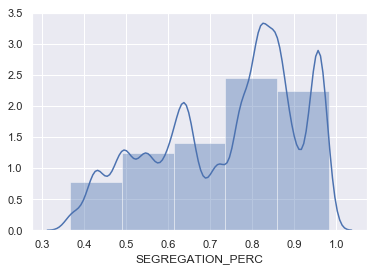

In [64]:
sns.set()
sns.distplot(mergedf.SEGREGATION_PERC, bins=5)

Text(0.5, 1.0, 'SEGREGATION AND WARDS')

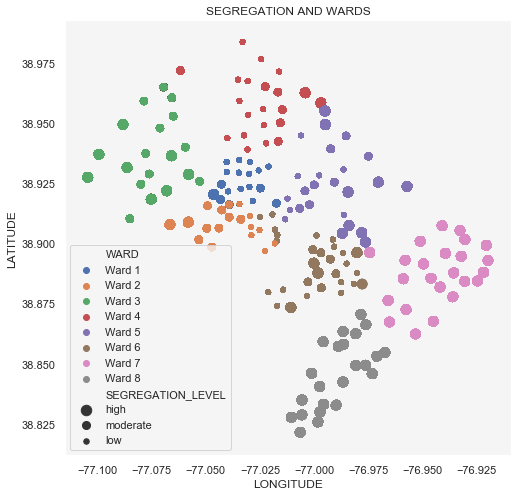

In [65]:
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'whitesmoke'})
plt.figure(figsize=(8,8))

sns.color_palette('dark')
g = sns.scatterplot(data=racedf, x='LONGITUDE', y='LATITUDE', s=60, hue='WARD', 
                    size='SEGREGATION_LEVEL', edgecolor='none', sizes = [110, 65, 30])
g.set_title("SEGREGATION AND WARDS")

In [66]:
#Generating wardf, holding info per ward 
racedf = pd.merge(racedf, census_full[['FAGI_MEDIAN_2010', 'FAGI_MEDIAN_2013','FAGI_MEDIAN_2011',  'FAGI_MEDIAN_2012', 'FAGI_MEDIAN_2014', 
                 'FAGI_MEDIAN_2015', 'UNITS', 'OCCUPIED_UNITS', 'VACANT_UNITS', 'TRACT']], on='TRACT', how='left')

racedf['FAGI_2010_MTOT'] = racedf['FAGI_MEDIAN_2010'] * racedf['POP']
racedf['FAGI_2011_MTOT'] = racedf['FAGI_MEDIAN_2011'] * racedf['POP']
racedf['FAGI_2012_MTOT'] = racedf['FAGI_MEDIAN_2012'] * racedf['POP']
racedf['FAGI_2013_MTOT'] = racedf['FAGI_MEDIAN_2013'] * racedf['POP']
racedf['FAGI_2014_MTOT'] = racedf['FAGI_MEDIAN_2014'] * racedf['POP']
racedf['FAGI_2015_MTOT'] = racedf['FAGI_MEDIAN_2015'] * racedf['POP']

racedf.columns

wardf = racedf[['POP', 'WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP',
       'OTHER', 'WARD', 'UNITS',
       'OCCUPIED_UNITS', 'VACANT_UNITS', 'FAGI_2010_MTOT', 'FAGI_2011_MTOT',
       'FAGI_2012_MTOT', 'FAGI_2013_MTOT', 'FAGI_2014_MTOT', 'FAGI_2015_MTOT']].groupby('WARD').sum()

#average income per tract calulcated by the medians per tract * population, summed per ward, divided by population ward
wardf['FAGI_2010'] = wardf['FAGI_2010_MTOT'] / wardf['POP']
wardf['FAGI_2011'] = wardf['FAGI_2011_MTOT'] / wardf['POP']
wardf['FAGI_2012'] = wardf['FAGI_2012_MTOT'] / wardf['POP']
wardf['FAGI_2013'] = wardf['FAGI_2013_MTOT'] / wardf['POP']
wardf['FAGI_2014'] = wardf['FAGI_2014_MTOT'] / wardf['POP']
wardf['FAGI_2015'] = wardf['FAGI_2015_MTOT'] / wardf['POP']
wardf = wardf.drop(['FAGI_2010_MTOT',
       'FAGI_2011_MTOT', 'FAGI_2012_MTOT', 'FAGI_2013_MTOT', 'FAGI_2014_MTOT',
       'FAGI_2015_MTOT'], axis=1)

wardf['SEGREGATION_PERC'] = (wardf[['WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP',
       'OTHER']]).max(axis=1) / wardf['POP']
     
wardf['MAJORITY_RACE'] = wardf[['WHITE', 'BLACK', 'NTV_AMR', 'ASIAN', 'PAC_ISL', 'HISP',
       'OTHER']].idxmax(axis=1)  
    
SEGREGATION_LEVEL = []
for ind, row in wardf.iterrows():
    if wardf.loc[ind, 'SEGREGATION_PERC']>= .85:
        SEGREGATION_LEVEL.append("high")
    if (wardf.loc[ind, 'SEGREGATION_PERC'] >= .70) & (wardf.loc[ind, 'SEGREGATION_PERC'] < .85):
        SEGREGATION_LEVEL.append("moderate")
    if wardf.loc[ind, 'SEGREGATION_PERC'] < .70:
        SEGREGATION_LEVEL.append("low")
wardf['SEGREGATION_LEVEL'] = SEGREGATION_LEVEL

wardf = wardf.reset_index(level=0)
wardf.head()

WARD       POP     WHITE     BLACK  NTV_AMR    ASIAN  PAC_ISL      HISP  \
0  Ward 1  50948513  25349952  16033684   256016  2153181    29707  10394490   
1  Ward 2  65799169  48904601   6517527   188846  5553082    57145   6732424   
2  Ward 3  57834238  48619583   2733279   123069  3760851    21863   4317429   
3  Ward 4  41589864  10851604  23570502   187616   686565    31931   8142308   
4  Ward 5  35292316   5348083  27431051   131674   481743    14286   2067096   

     OTHER     UNITS  OCCUPIED_UNITS  VACANT_UNITS     FAGI_2010  \
0  5135146  26067355        23767987       2299368  43581.468022   
1  2588365  43441519        38462526       4978993  68187.052872   
2   840322  30727482        28459771       2267711  90430.309343   
3  4599966  17196081        15873925       1322156  49096.710439   
4   913438  16254320        14546456       1707864  38461.074894   

      FAGI_2011     FAGI_2012     FAGI_2013      FAGI_2014      FAGI_2015  \
0  46275.160534  48464.967245  49801.106944   49689.678438   54412.183213   
1  70328.971880  72577.623494  71986.039664   76427.773183   80193.235632   
2  86851.649670  89879.973466  85227.156240  101314.537969  103639.684930   
3  49603.406435  51764.795734  50396.912579   55959.806491   58186.672114   
4  38067.120160  39332.789515  40211.936922   43230.226844   46046.285879   

   SEGREGATION_PERC MAJORITY_RACE SEGREGATION_LEVEL  
0          0.497560         WHITE               low  
1          0.743240         WHITE          moderate  
2          0.840671         WHITE          moderate  
3          0.566737         BLACK               low  
4          0.777253         BLACK          moderate

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text yticklabel objects>)

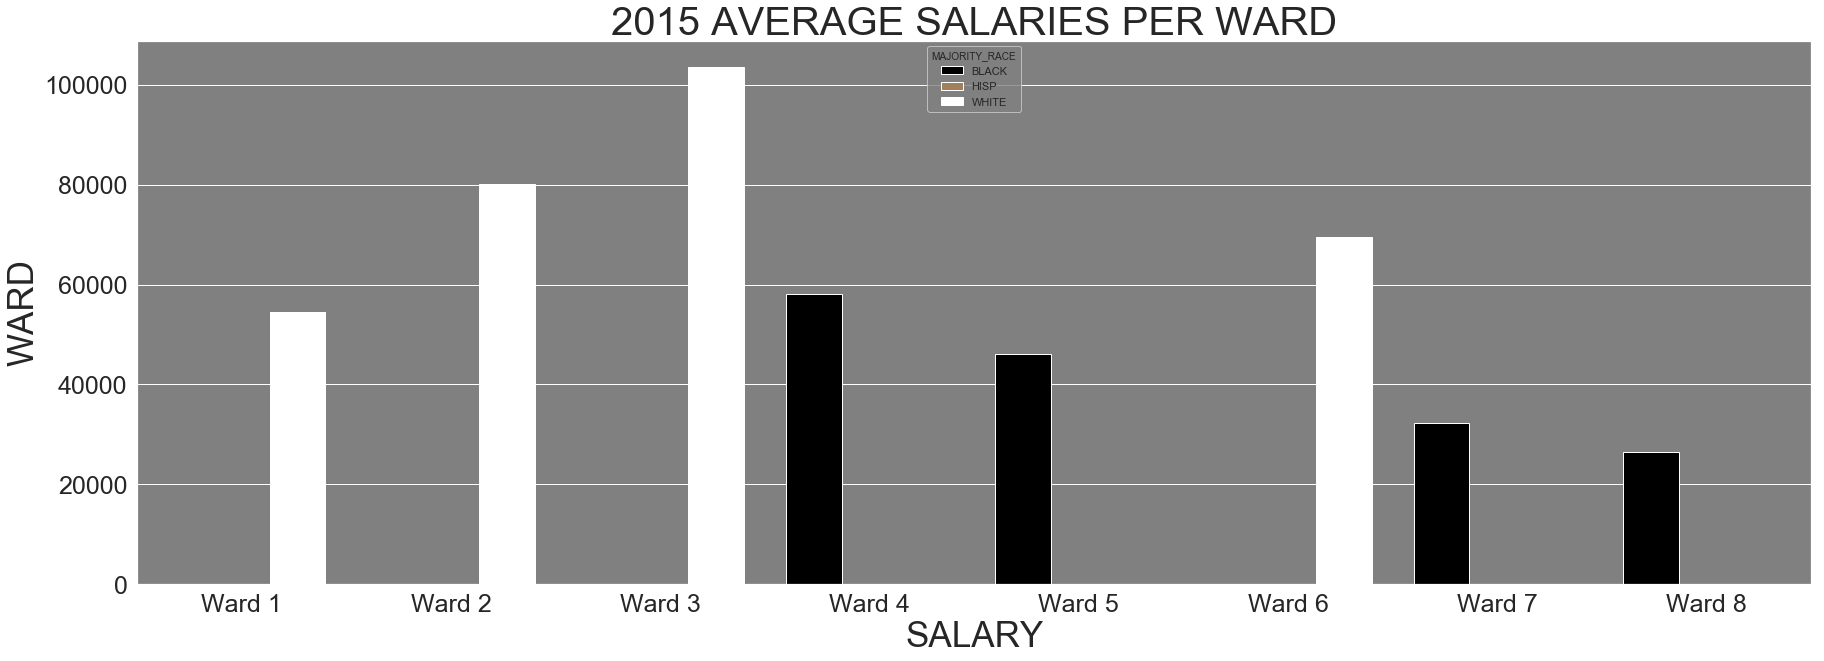

In [67]:
race = ['black', 'light brown', 'white']
sns.set_style({'axes.grid' : True}, rc={'axes.facecolor':'gray'})

wardf.MAJORITY_RACE = wardf.MAJORITY_RACE.astype(racecat)
wardf.SEGREGATION_LEVEL = wardf.SEGREGATION_LEVEL.astype(segcat) 

plt.figure(figsize=(30,10))
g = sns.barplot(x=wardf.WARD, y=wardf.FAGI_2015, hue=wardf.MAJORITY_RACE, palette=sns.xkcd_palette(race))
g.set_title('2015 AVERAGE SALARIES PER WARD', fontsize='40')
plt.xlabel('SALARY', fontsize=35)
plt.ylabel('WARD', fontsize=35)
plt.xticks(size=25)
plt.yticks(size=25)

**TAKEAWAYS:** <br>
-  Aside from Ward 1 and Ward 4, white-majority wards have higher incomes than black-majority wards.
-  WARDS 2 and 3 make the most (NW)
-  WARD 6 makes almost as WARD 2 (central)
-  WARDS 7 and 8 make the least (SE)

In [68]:
fg2df = pd.merge(fpricedf2, racedf[['TRACT', 'MAJORITY_RACE']], on='TRACT', how='left')
fg2df['MAJORITY_RACE'] = fg2df['MAJORITY_RACE'].astype(racecat)

In [69]:
fg2df.head()

TRACT     PRICE  LATITUDE  LONGITUDE  FAGI_MEDIAN_2012 AFFORD  \
0    100  737000.0   38.9092 -77.058211           92634.0     no   
1    100  737000.0   38.9092 -77.058211           92634.0     no   
2    100  737000.0   38.9092 -77.058211           92634.0     no   
3    100  737000.0   38.9092 -77.058211           92634.0     no   
4    100  737000.0   38.9092 -77.058211           92634.0     no   

   LOW_MORTGAGE  HIGH_MORTGAGE MAJORITY_RACE  
0       2161.46        2470.24         WHITE  
1       2161.46        2470.24         WHITE  
2       2161.46        2470.24         WHITE  
3       2161.46        2470.24         WHITE  
4       2161.46        2470.24         WHITE

Text(0.5, 1.0, '2010-2014 AFFORDABILITY OF 2-BEDROOM SALES')

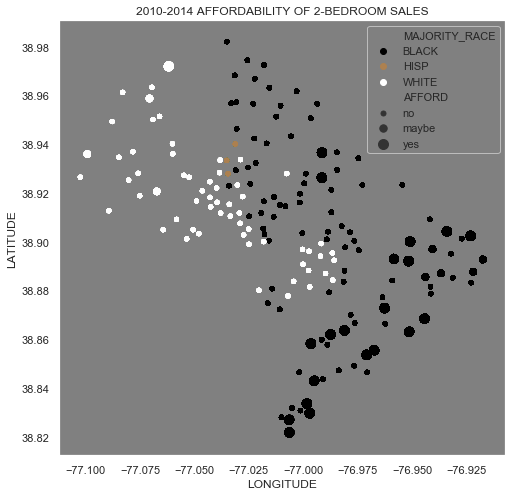

In [70]:
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'grey'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=fg2df, x='LONGITUDE', y='LATITUDE', 
                    size='AFFORD', sizes = [25, 55, 100], hue='MAJORITY_RACE', **{"alpha":.9}, 
                    edgecolor='none', palette=sns.xkcd_palette(race))
g.set_title('2010-2014 AFFORDABILITY OF 2-BEDROOM SALES')

In [71]:
sg2df = pd.merge(spricedf2, racedf[['TRACT', 'MAJORITY_RACE']], on='TRACT', how='left')
sg2df['MAJORITY_RACE'] = sg2df['MAJORITY_RACE'].astype(racecat)

Text(0.5, 1.0, '2015-2018 AFFORDABILITY OF 2-BEDROOM SALES')

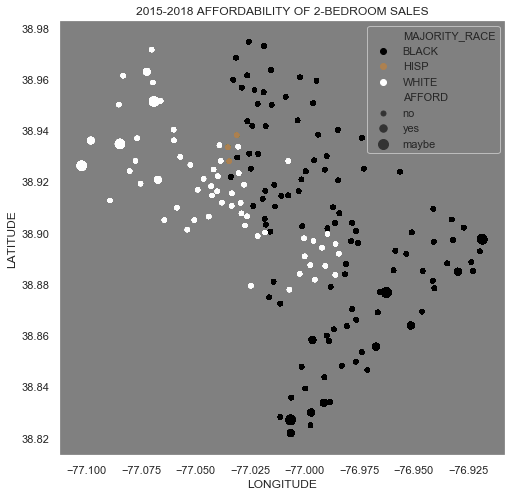

In [72]:
sns.set_style({'axes.grid' : False}, rc={'axes.facecolor':'gray'})
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=sg2df, x='LONGITUDE', y='LATITUDE', size='AFFORD',
                    hue='MAJORITY_RACE', **{"alpha":.9}, sizes=[25, 55, 100], 
                    edgecolor='none', palette=sns.xkcd_palette(race))
g.set_title('2015-2018 AFFORDABILITY OF 2-BEDROOM SALES')